## Homework6 by group3


#### Authors:Kaiyang LIN,Tianhao MOU,Lin LIU,Yunxia SHI,Guangyi NING

### Exercise 1

Let $X$ be an $n \times n$ matrix with all positive elements.  The spectral radius $r(X)$ of $X$ is maximum of $|\lambda|$ over all eigenvalues $\lambda$ of $X$, where $|\cdot|$ is the modulus of a complex number.

A version of the **local spectral radius theorem** states that if $X$ has all positive entries and $v$ is any strictly positive $n \times 1$ vector, then

$$
    \lim_{i \to \infty} \| X^i v \|^{1/i} \to r(X) 
    \qquad \qquad \text{(LSR)}
$$

where $\| \cdot \|$ is the usual Euclidean norm.

Intuitively, the norm of the iterates of a positive vector scale like $r(X)$ asymptotically.

The data file `matrix_data.txt` contains the data for a single matrix $X$.  

1. Read it in and compute the spectral raduis using the tools for working with eigenvalues in `scipy.linalg`.

2. Test the claim in (LSR) iteratively, computing $\| X^i v \|^{1/i}$ for successively larger values of $i$.  See if the sequence so generated converges to $r(A)$.

## Solution

In [2]:
import numpy as np
import pandas as pd
from scipy.linalg import eigvals
from scipy.linalg.misc import norm
import matplotlib.pyplot as plt
from numba import vectorize, jit

In [3]:
#1、compute the spectral radius
matrix=pd.read_csv('./matrix_data.txt',header=None,sep= ' ')
matrix=np.array(matrix)
eigenvalues=eigvals(matrix)
SpectralRadius=np.max(abs(eigenvalues))
print('The real eigenvalues of the matrix is',SpectralRadius)

The real eigenvalues of the matrix is 1.00442776945


In [8]:
#2、test LSR
np.random.seed(0)
v=np.random.uniform(1,2,len(eigenvalues))
test_len = 10000
norm_value=np.zeros(test_len)
for i in range(test_len):
    norm_value[i]=(norm(np.mat(matrix)**(i+1)*np.mat(v).T))**(1/(i+1))
print('The estimated spectral radius is',norm_value[len(norm_value) - 1])
print('The deviation of real spectral radius and estimated spectral radius is', abs(norm_value[len(norm_value) - 1] - SpectralRadius))

The estimated spectral radius is 1.00460115421
The deviation of real spectral radius and estimated spectral radius is 0.000173384764188


### So we can conclude that the sequence generated converges to  r(A)

## Exercise 2

Recall that the quadratic map generates time series of the form

$$ x_{t+1} = 4 \, x_t (1 - x_t) $$

for some given $x_0$, and that these trajectories are chaotic.

This means that different initial conditions generate seemingly very different outcomes.

Nevertheless, the regions of the state space where these trajectories spend most of their time are in fact typically invariant to the initial condition.

Illustrate this by generating 100 histograms of time series generated from the quadratic map, with $x_0$ drawn independently from the uniform distribution on $(0, 1)$.  

Do they all look alike?

Try to make your code efficient.



## Solution

In [269]:
#@jit
#@vectorize
def ts_plot(g, xmin, xmax, x0, ts_length):
    fig, ax = plt.subplots()
    x = np.empty(ts_length)
    x[0] = x0
    for t in range(ts_length-1):
        x[t+1] = g(x[t])
    ax.hist(x)
    plt.show()

In [270]:
#@jit
#@vectorize
def initial(x0):
    xmin, xmax = 0, 1
    ts_length = 1000
    g = lambda x: 4 * x * (1 - x)
    ts_plot(g, xmin, xmax, x0, ts_length)
initial=np.vectorize(initial)

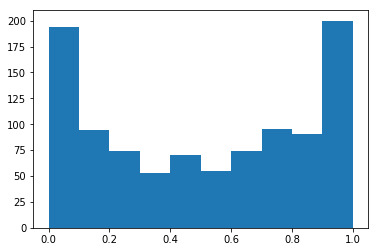

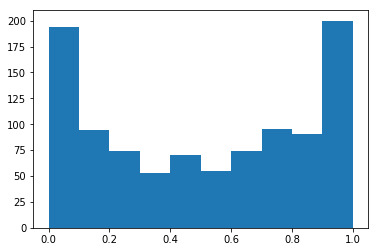

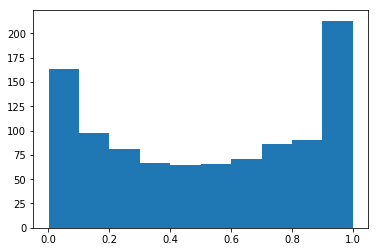

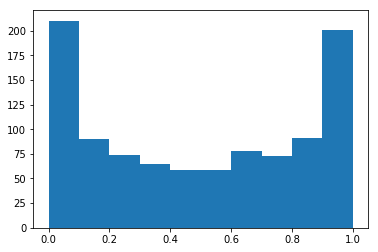

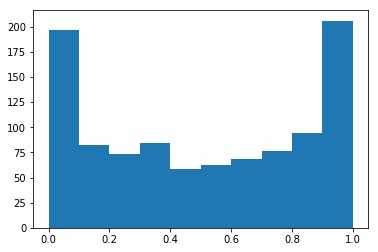

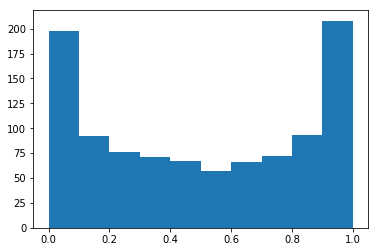

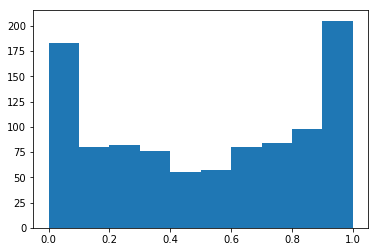

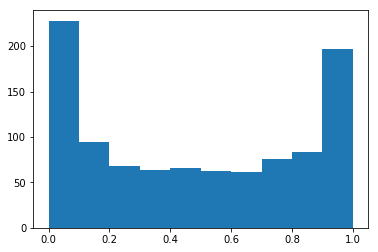

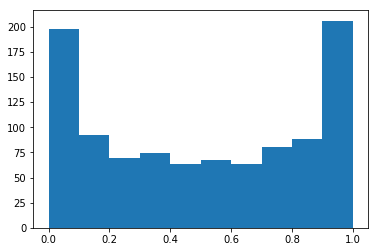

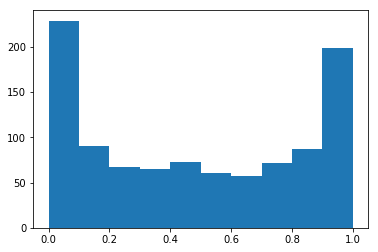

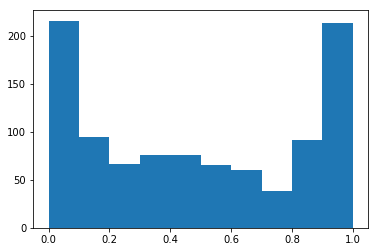

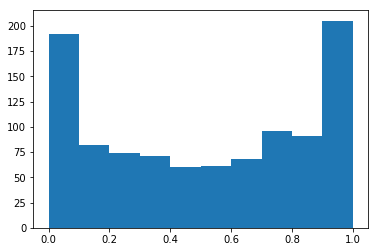

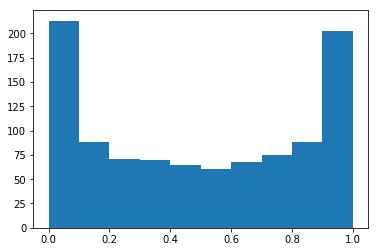

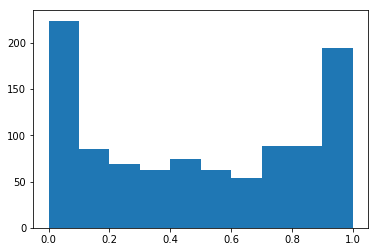

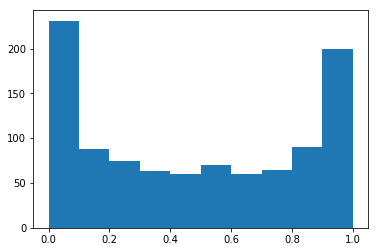

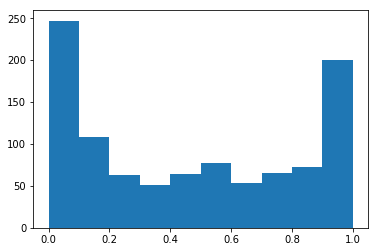

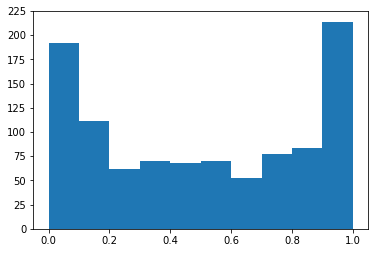

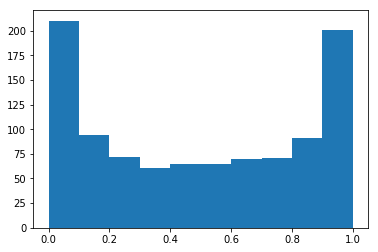

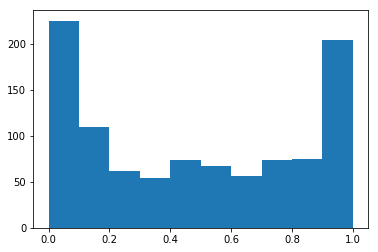

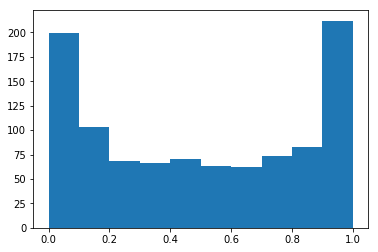

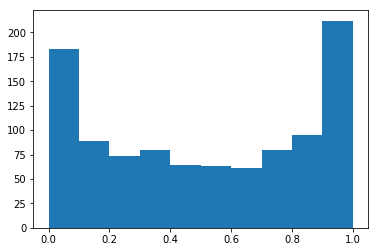

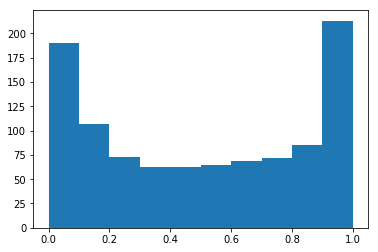

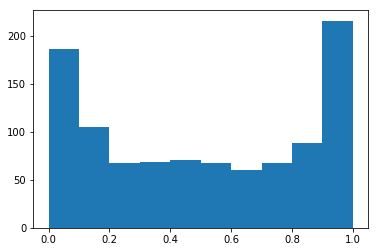

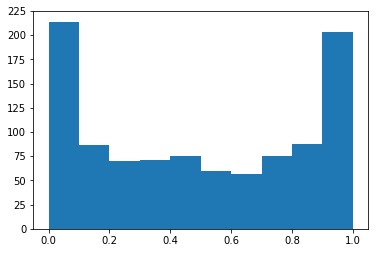

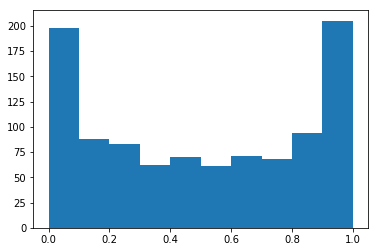

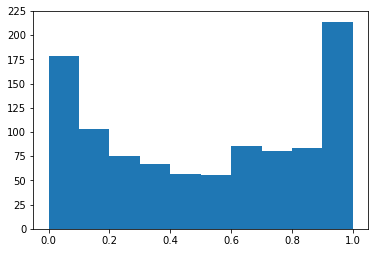

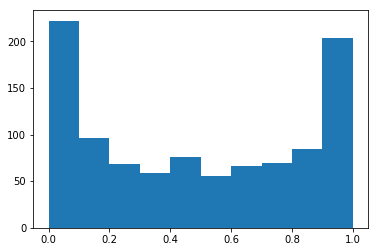

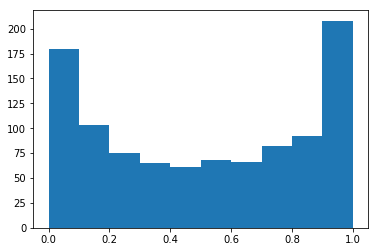

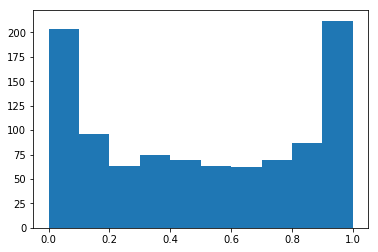

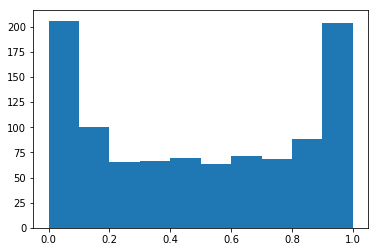

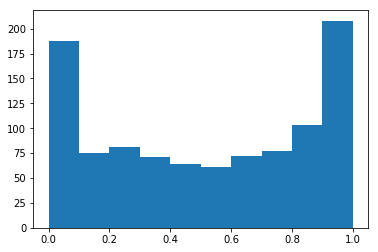

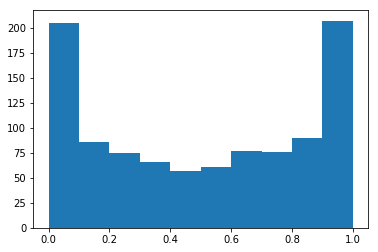

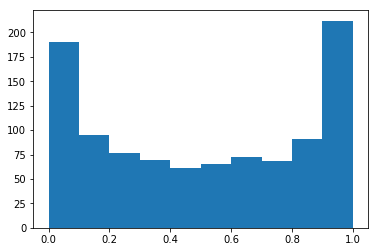

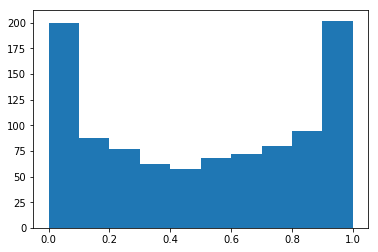

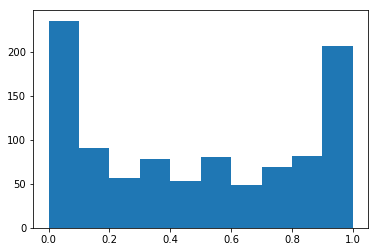

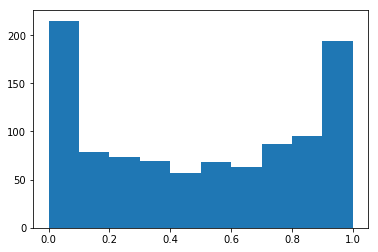

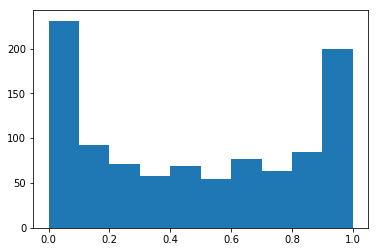

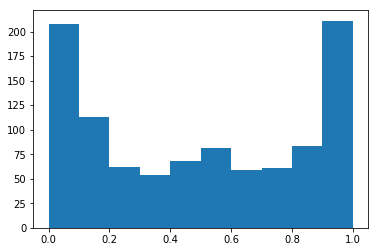

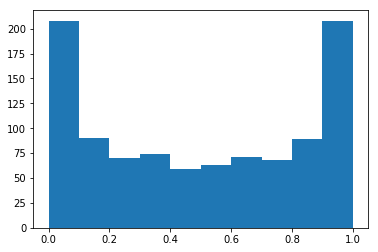

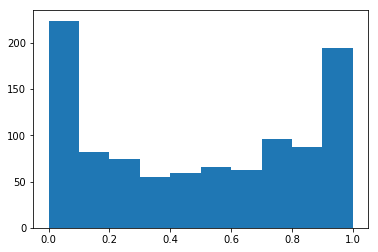

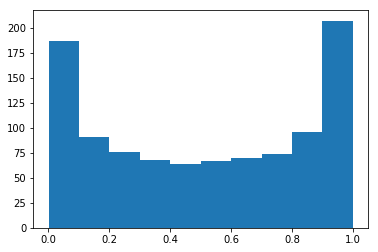

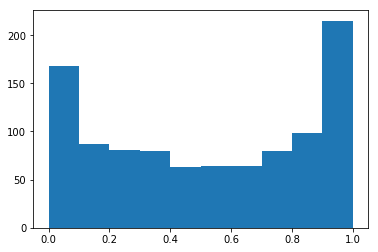

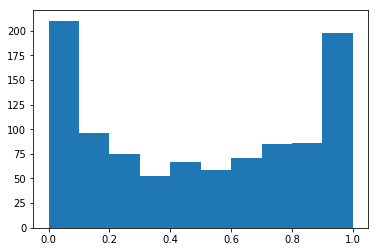

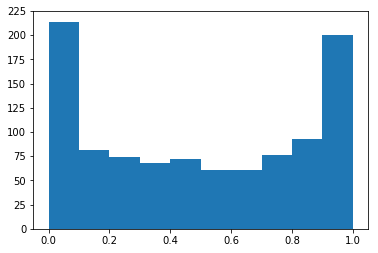

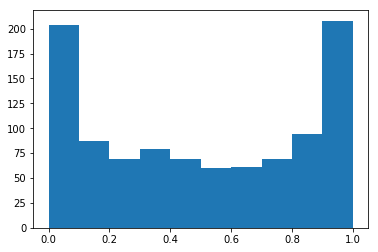

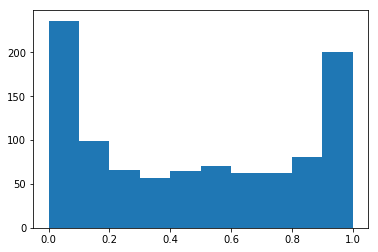

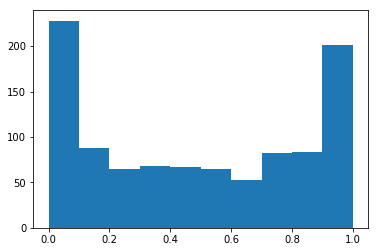

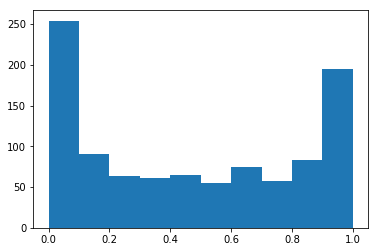

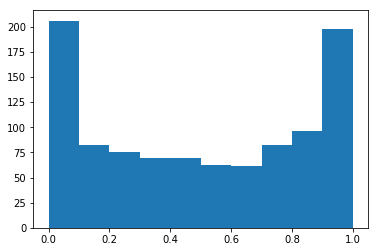

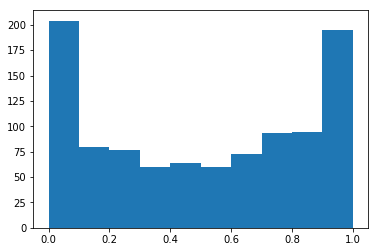

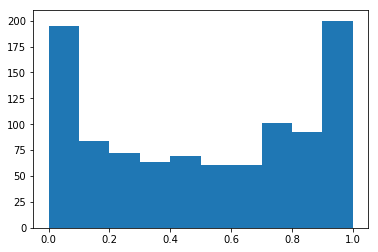

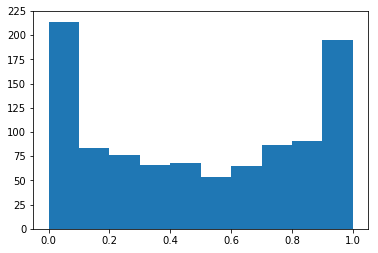

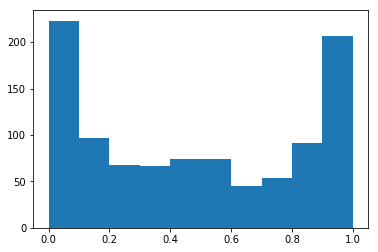

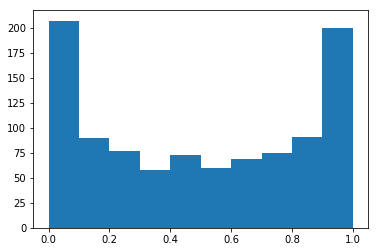

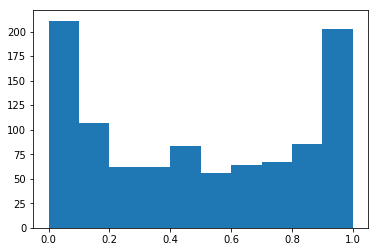

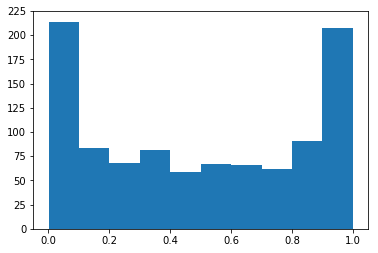

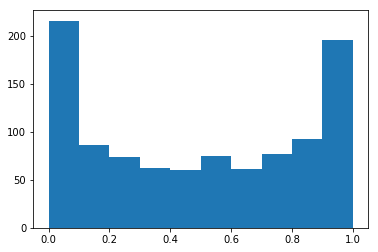

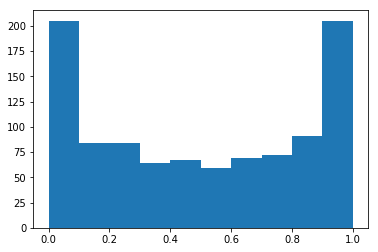

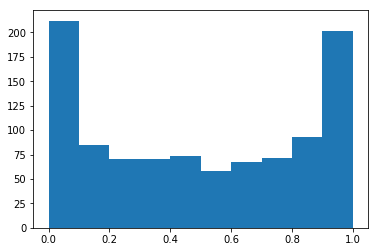

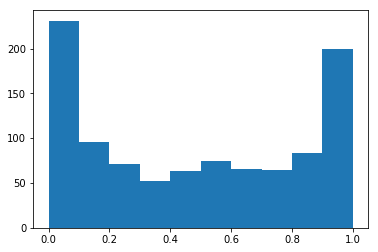

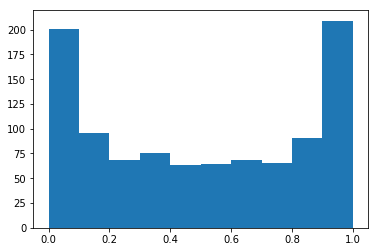

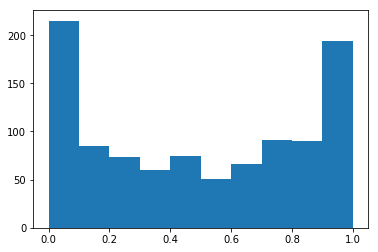

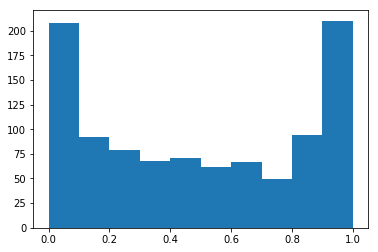

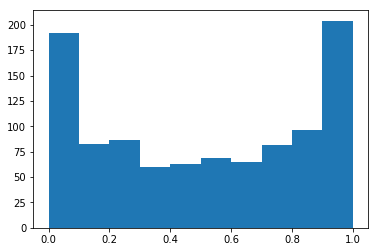

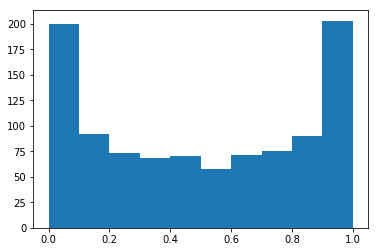

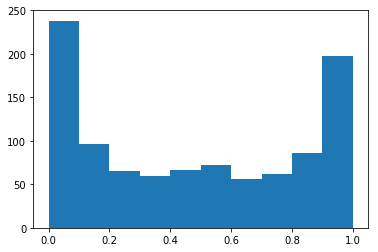

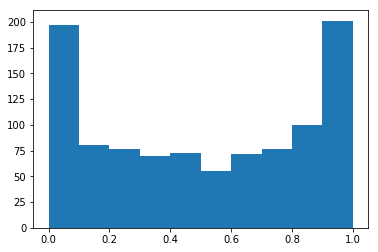

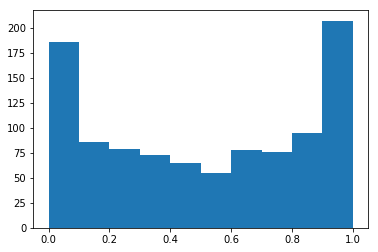

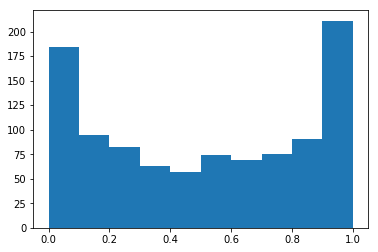

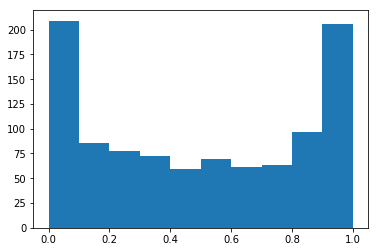

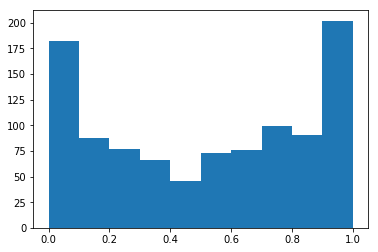

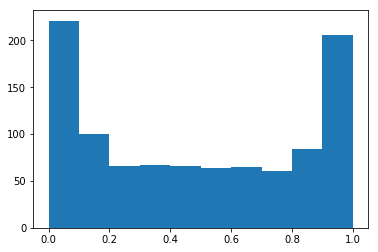

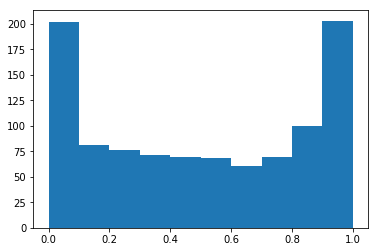

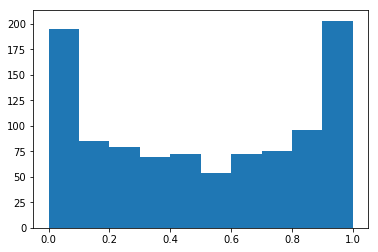

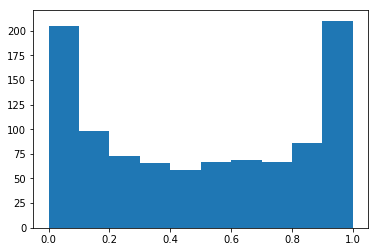

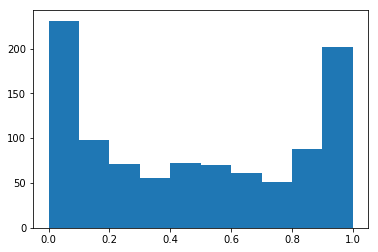

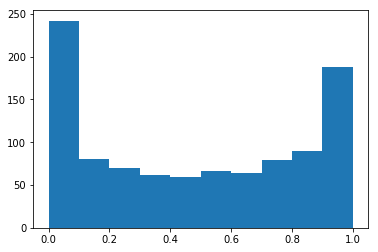

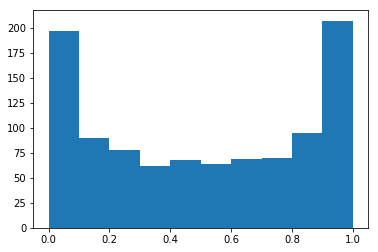

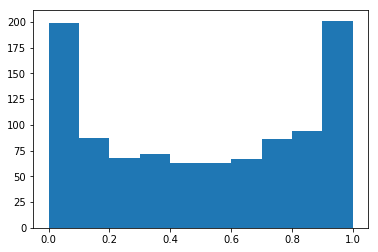

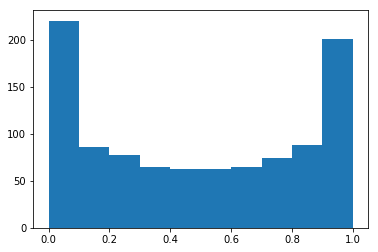

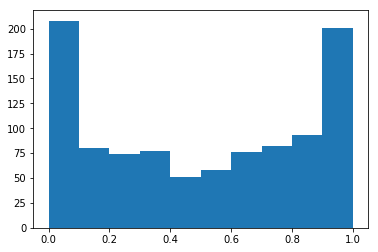

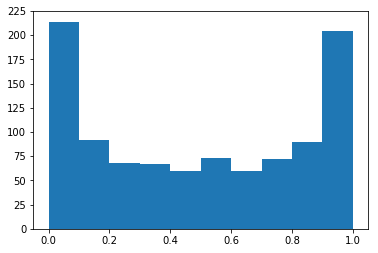

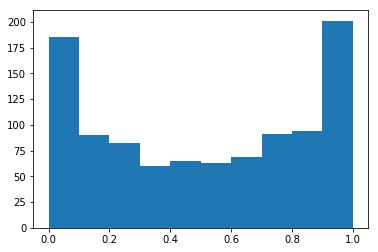

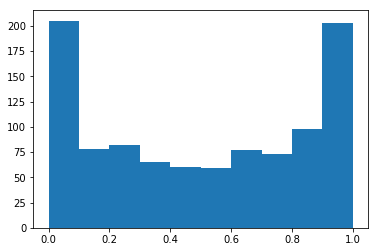

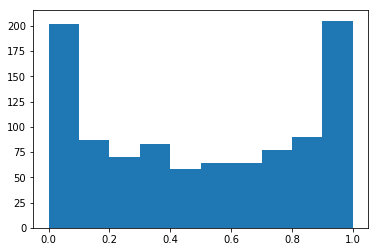

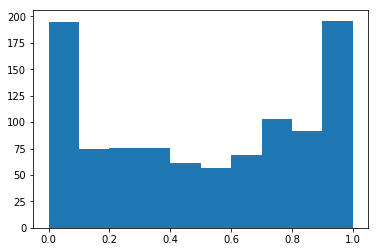

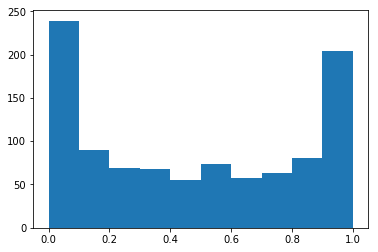

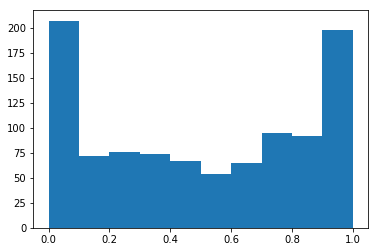

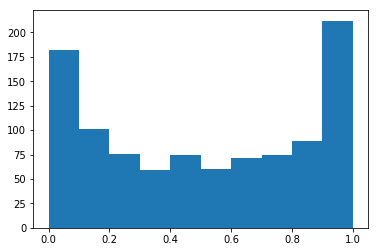

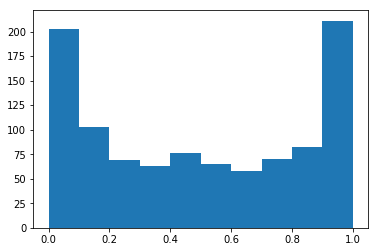

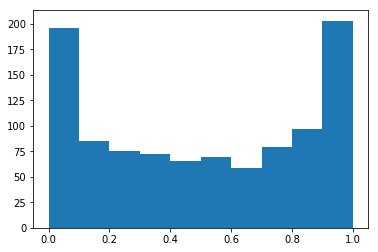

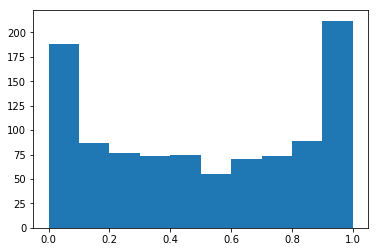

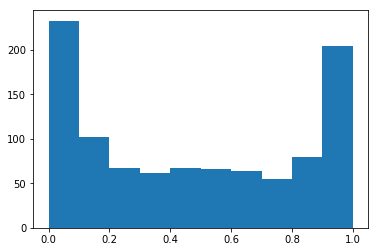

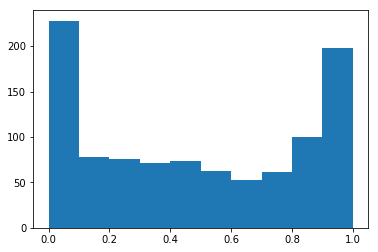

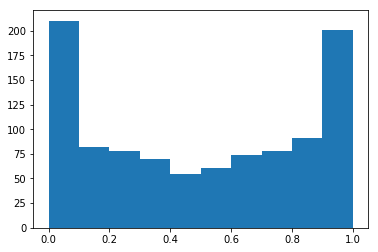

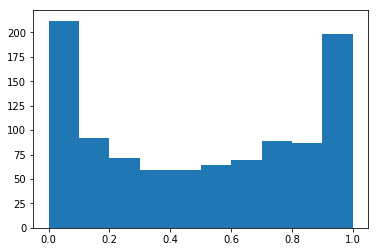

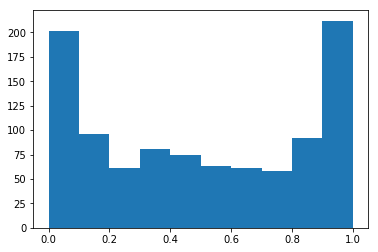

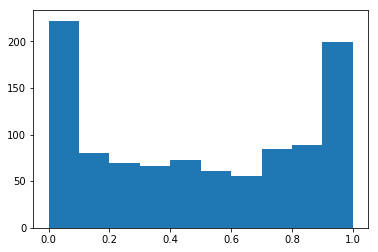

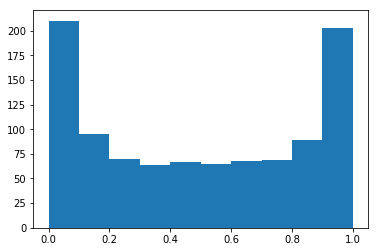

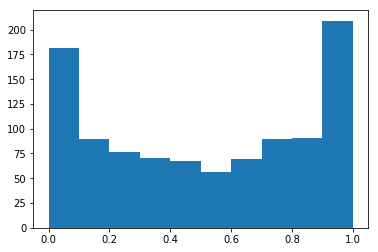

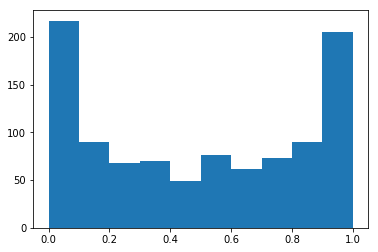

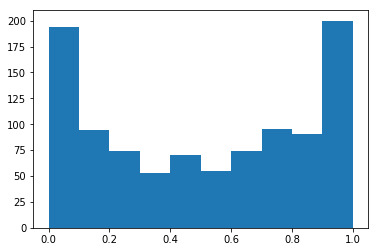

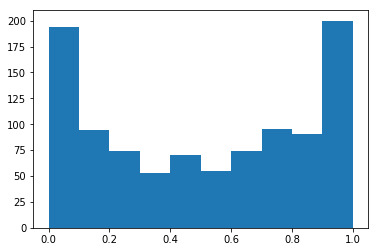

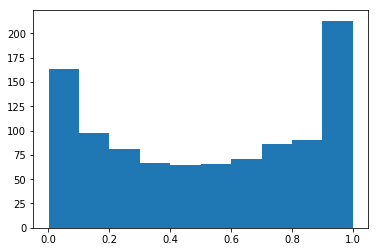

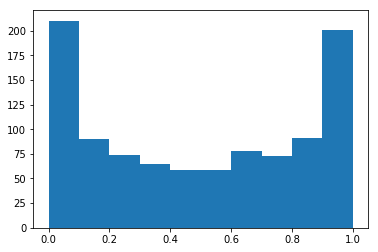

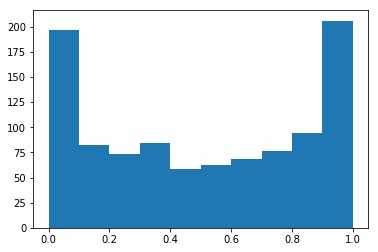

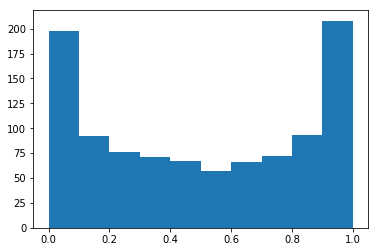

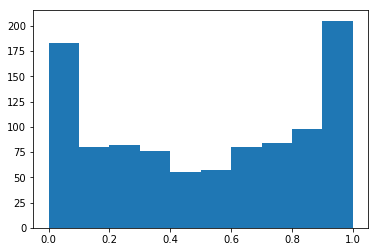

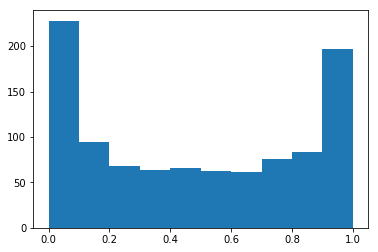

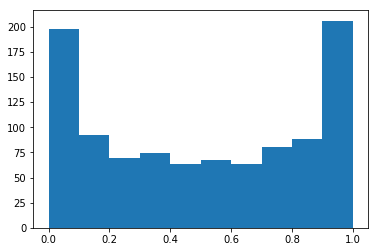

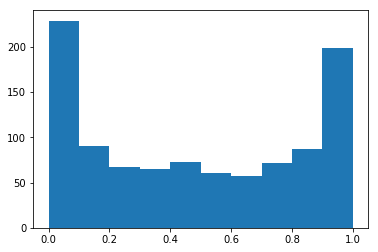

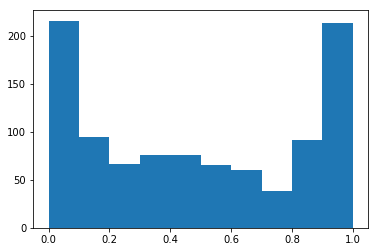

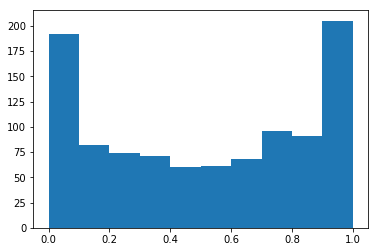

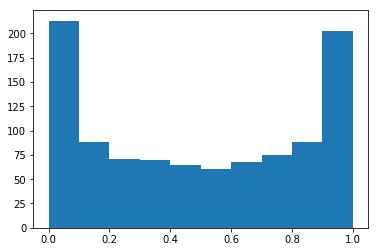

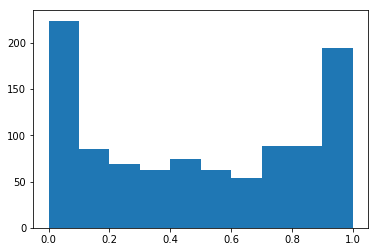

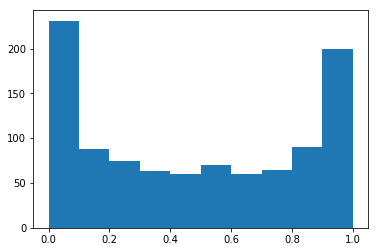

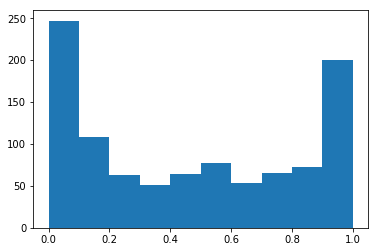

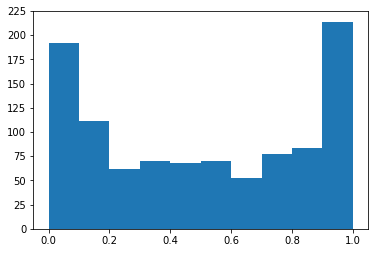

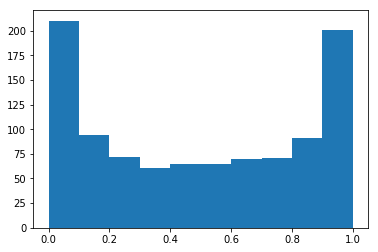

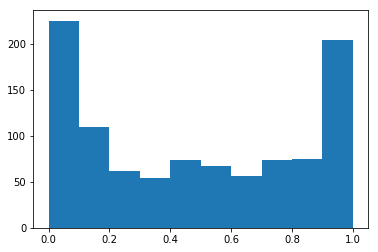

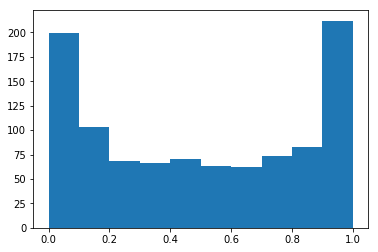

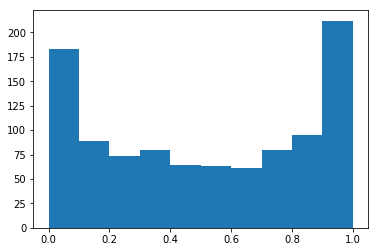

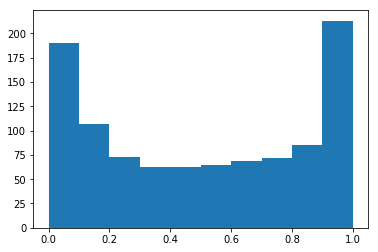

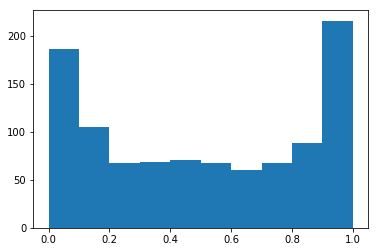

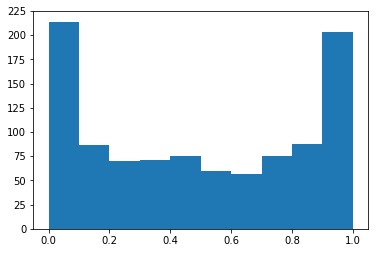

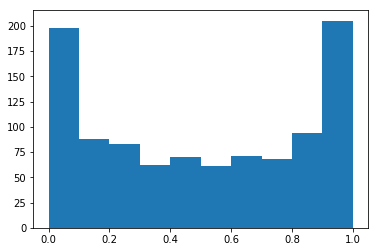

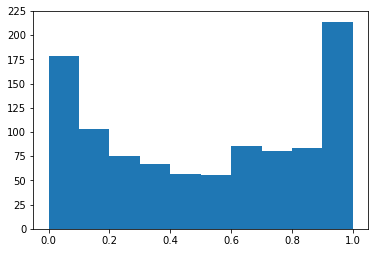

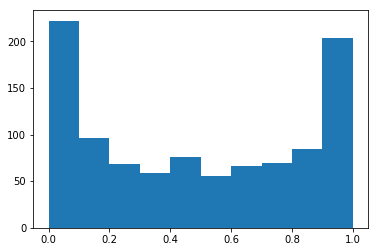

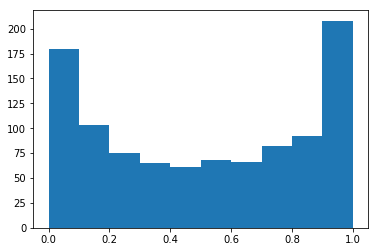

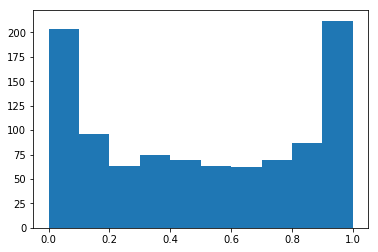

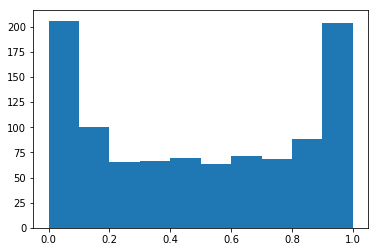

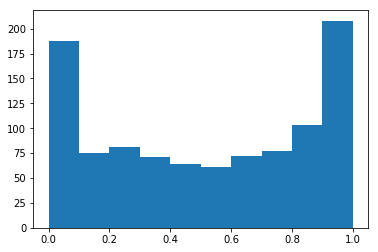

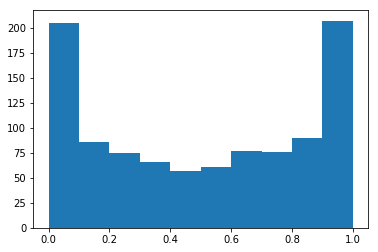

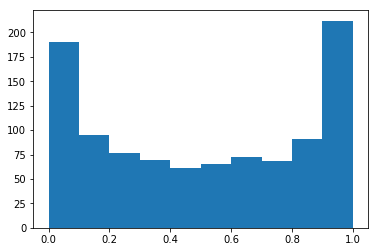

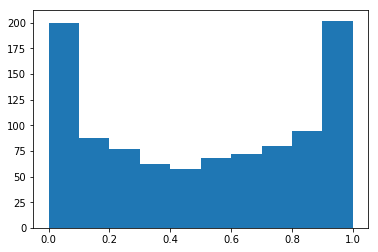

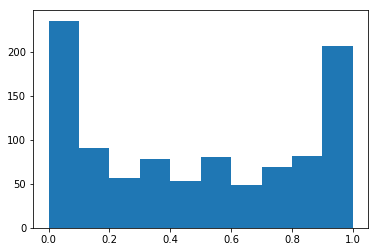

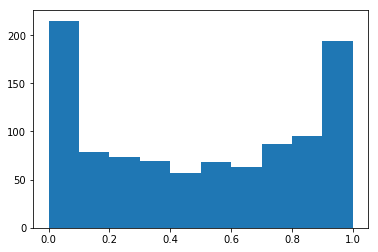

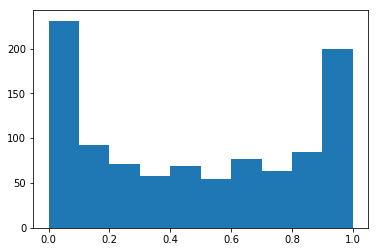

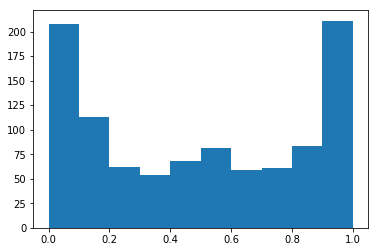

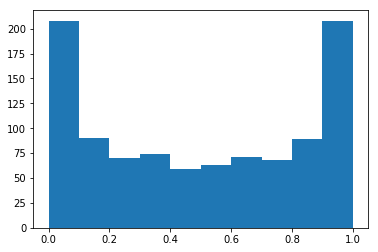

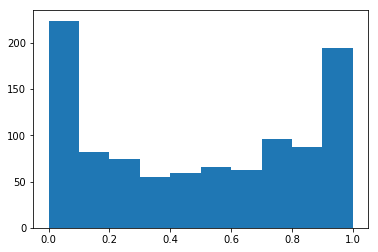

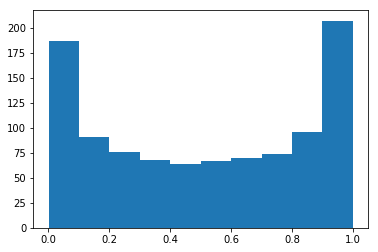

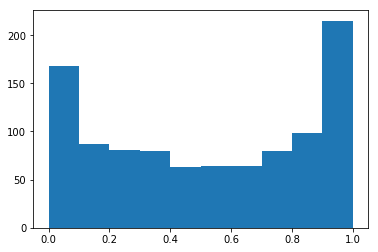

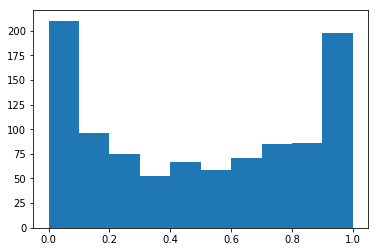

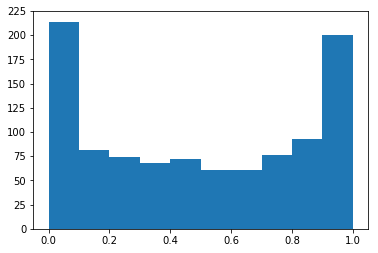

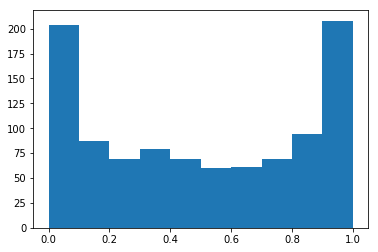

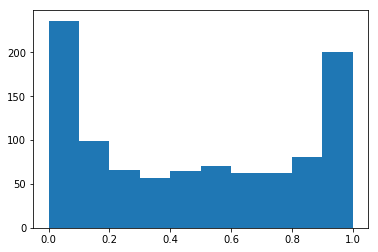

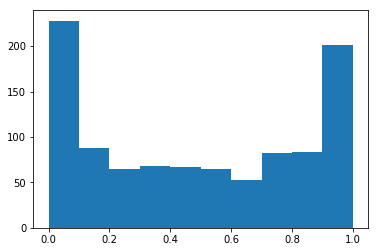

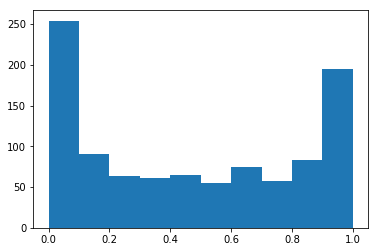

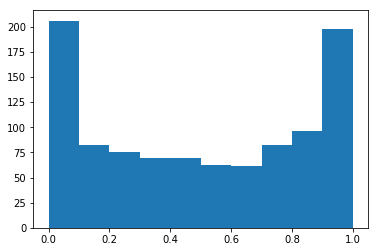

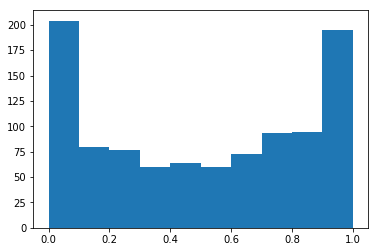

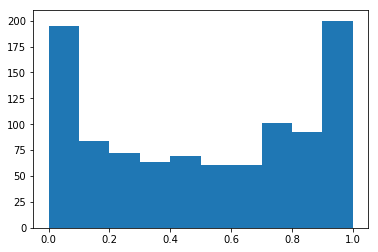

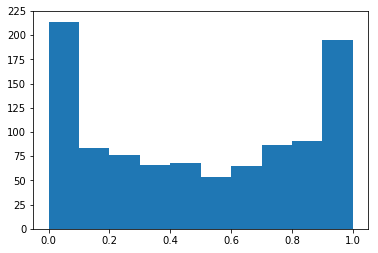

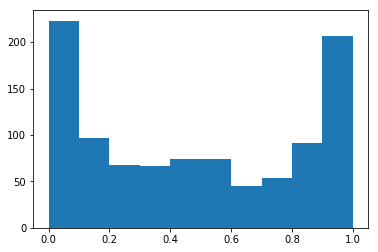

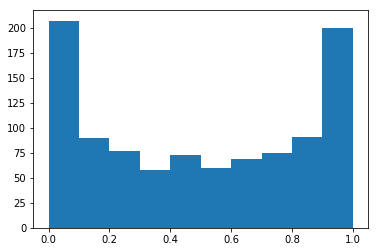

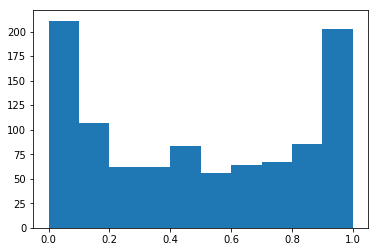

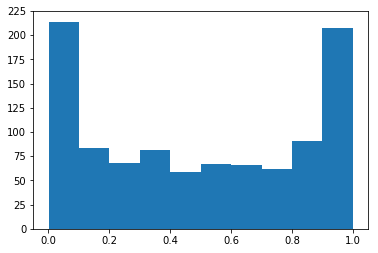

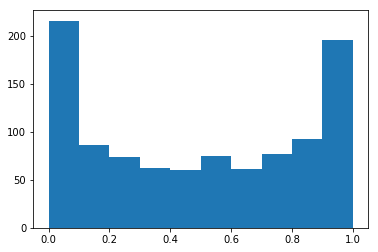

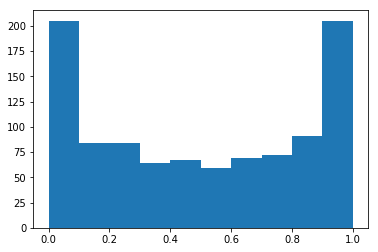

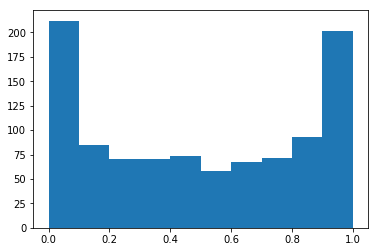

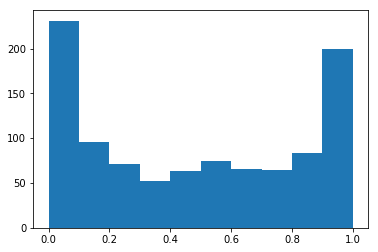

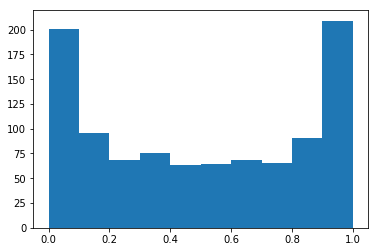

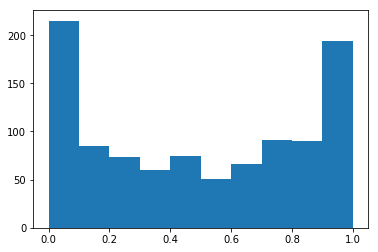

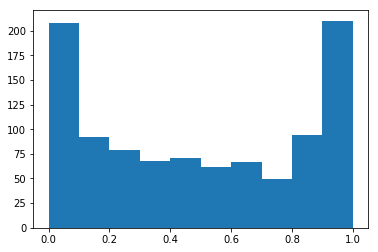

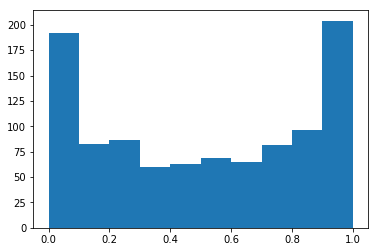

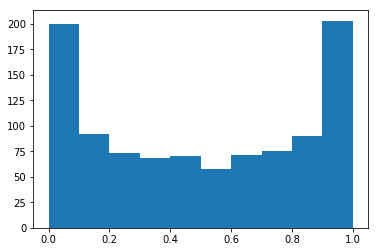

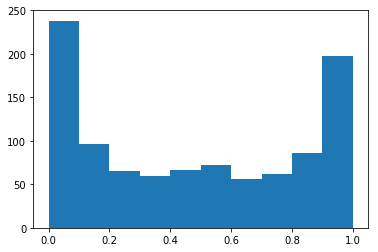

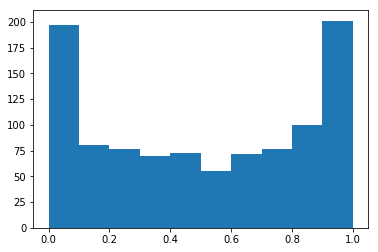

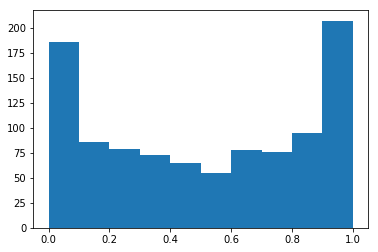

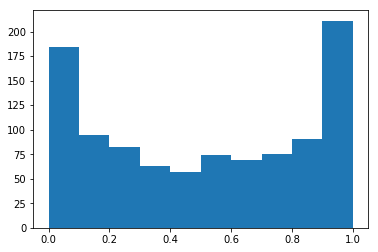

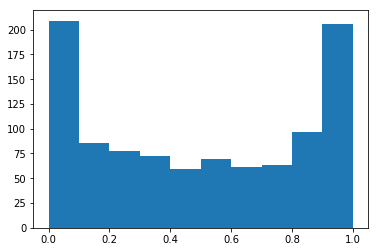

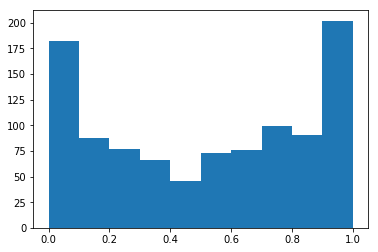

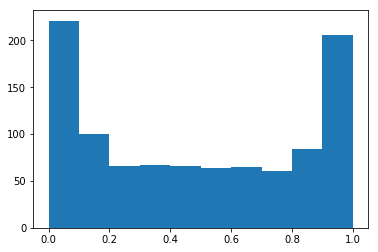

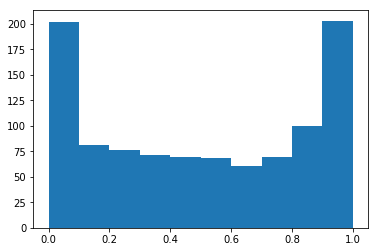

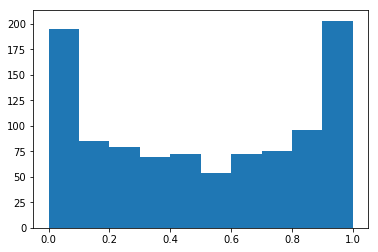

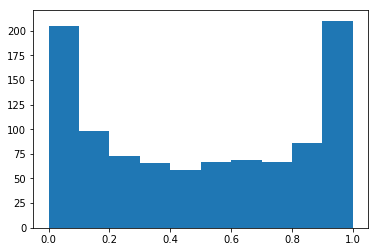

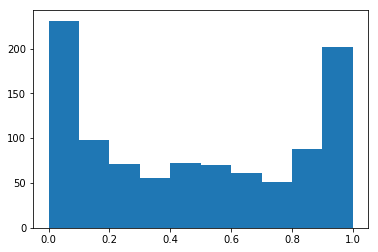

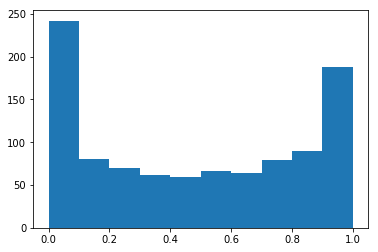

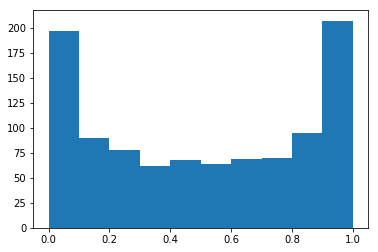

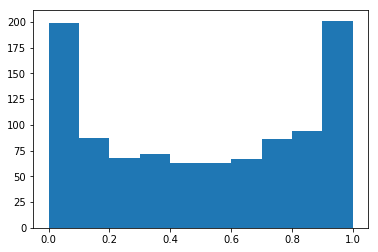

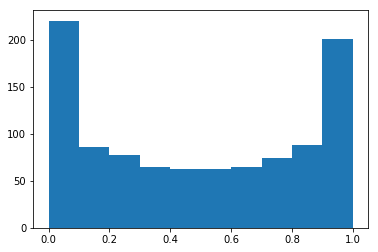

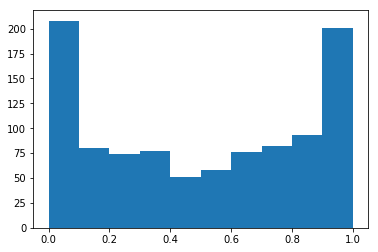

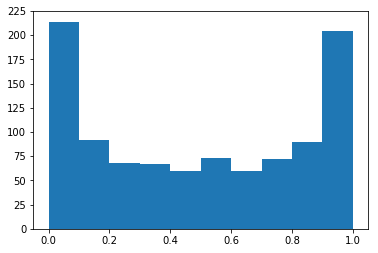

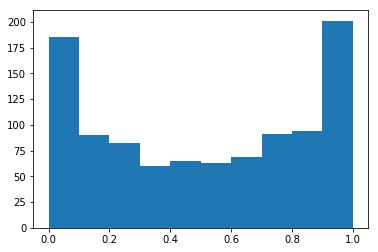

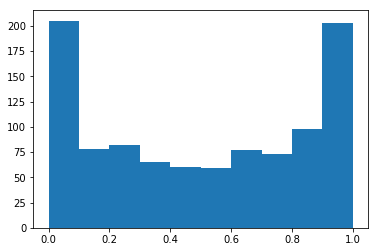

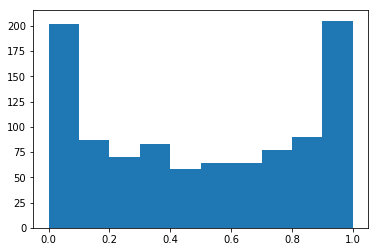

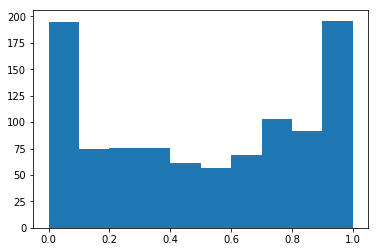

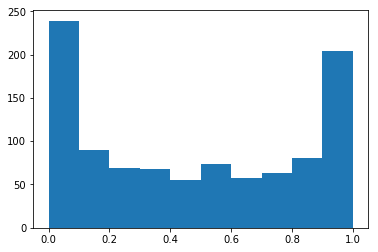

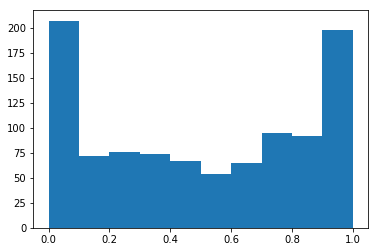

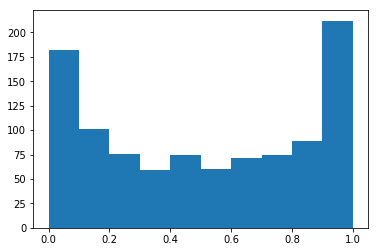

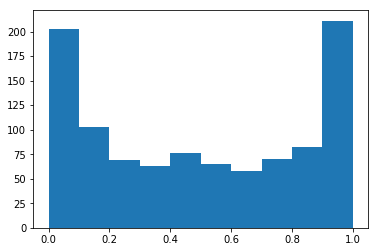

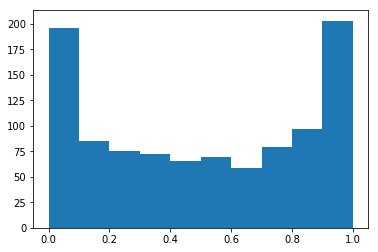

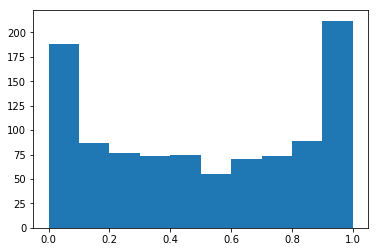

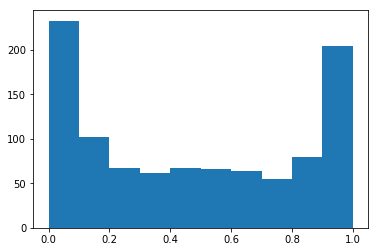

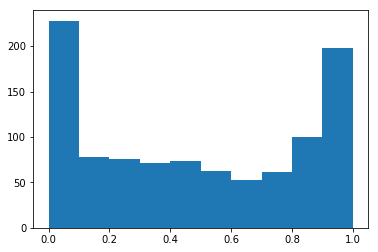

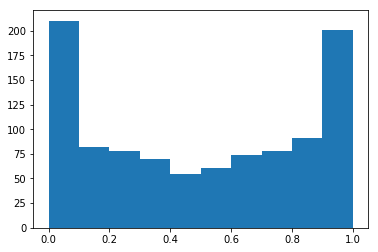

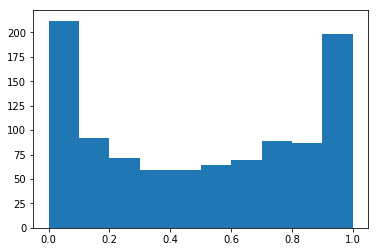

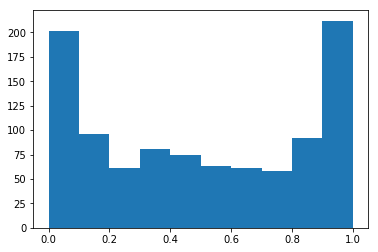

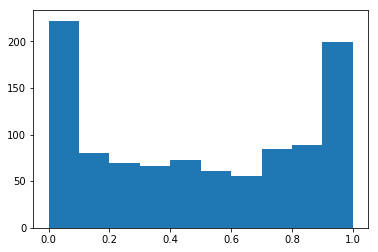

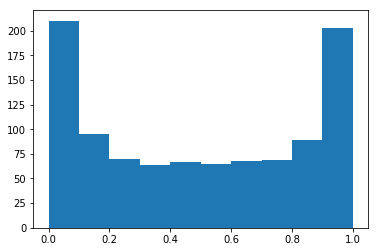

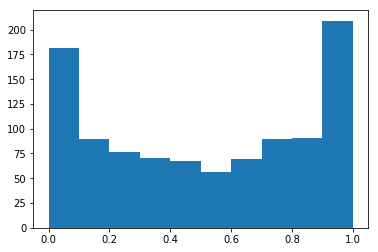

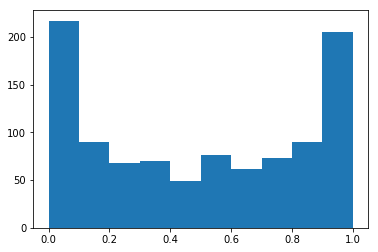

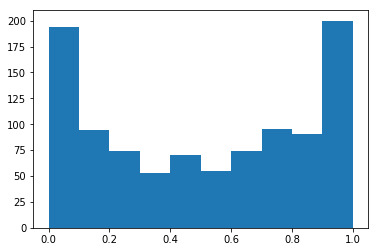

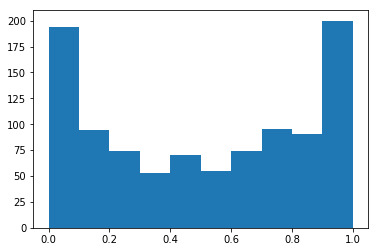

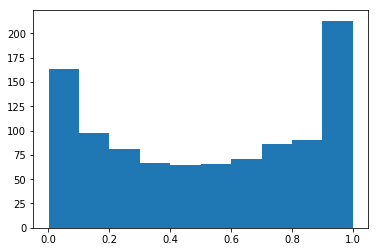

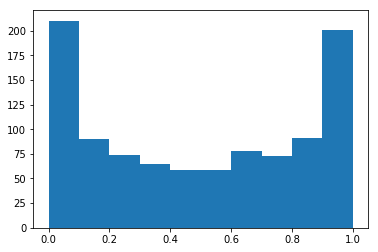

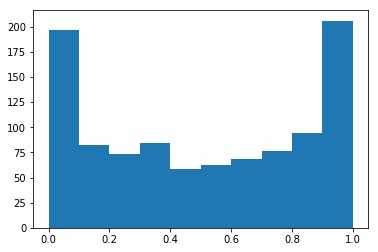

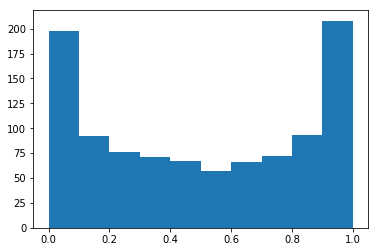

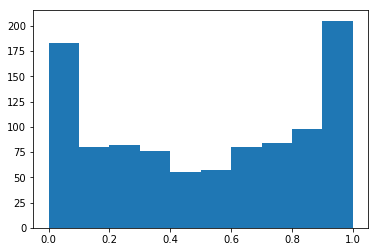

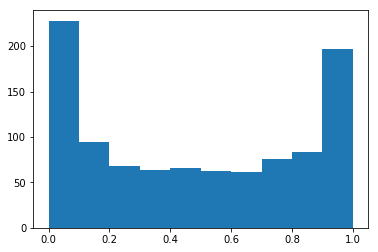

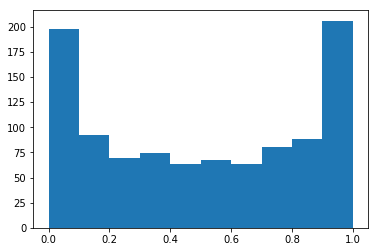

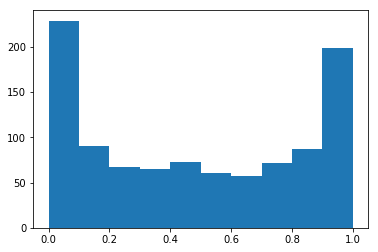

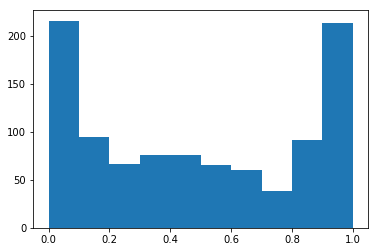

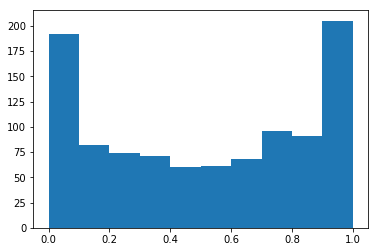

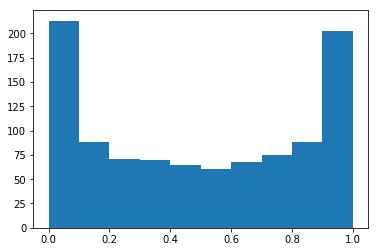

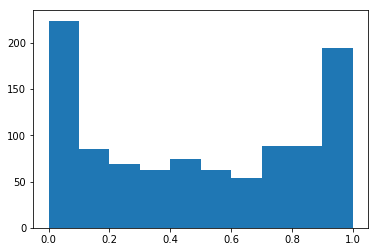

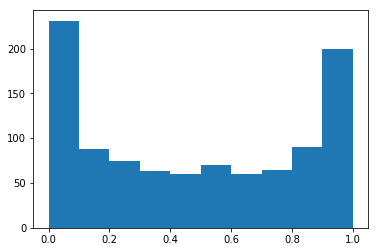

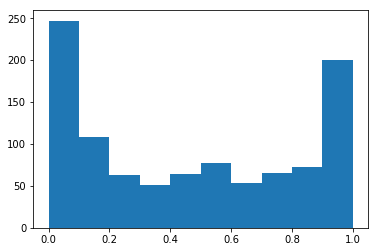

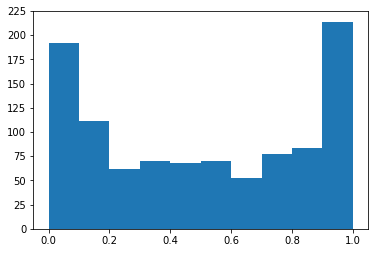

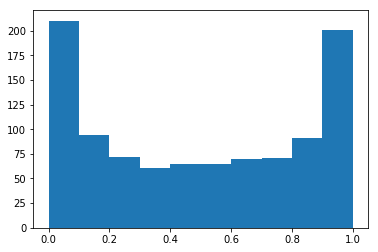

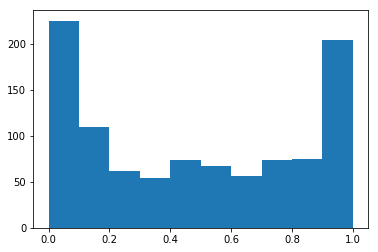

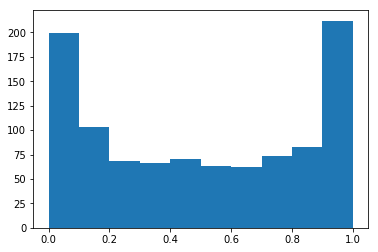

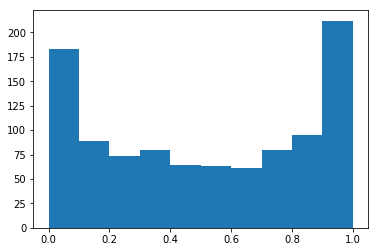

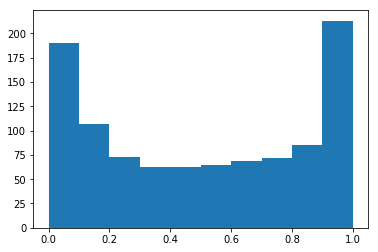

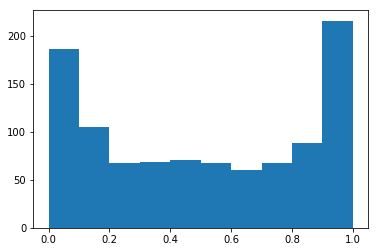

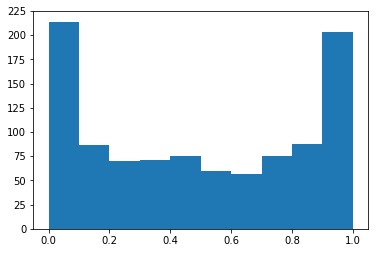

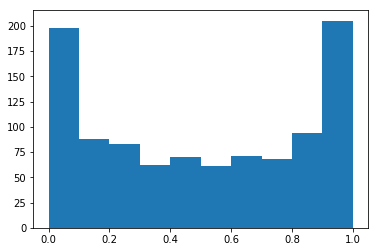

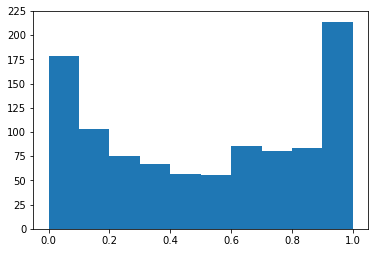

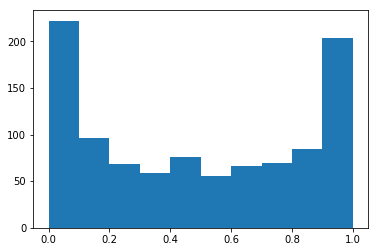

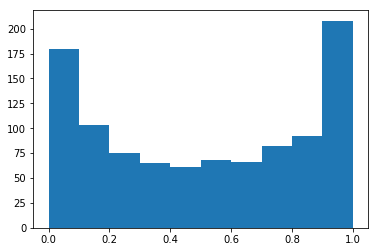

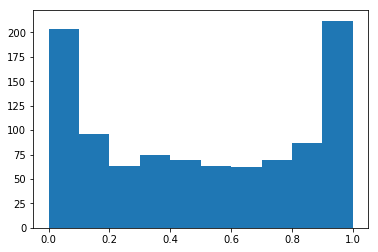

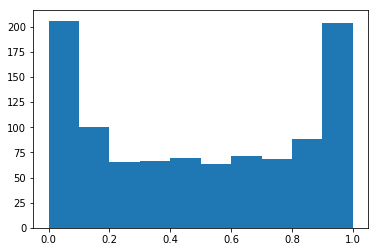

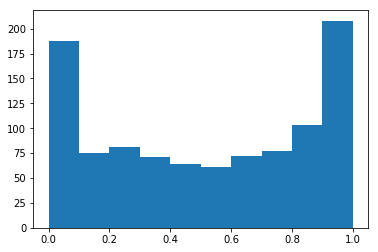

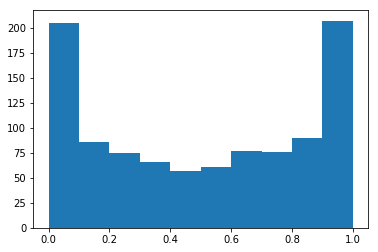

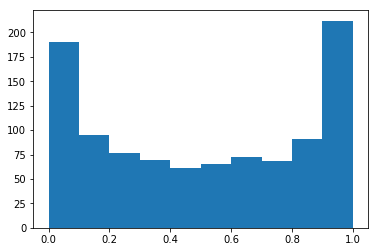

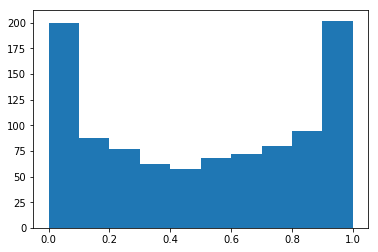

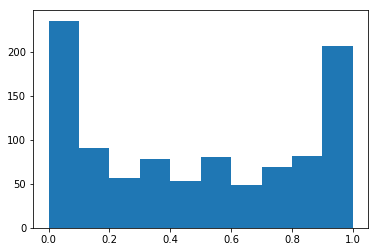

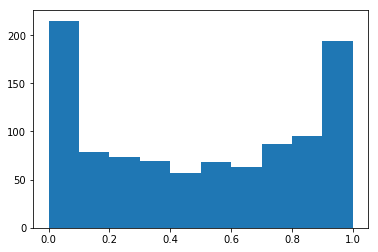

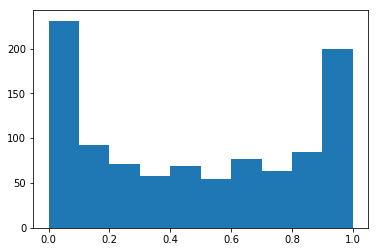

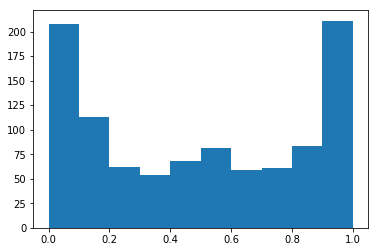

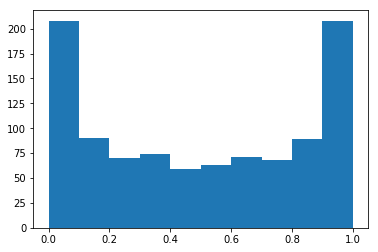

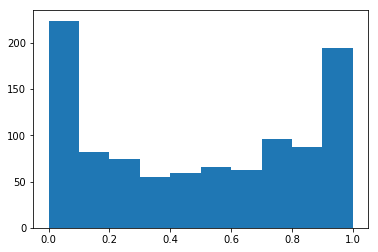

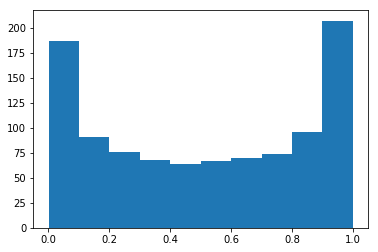

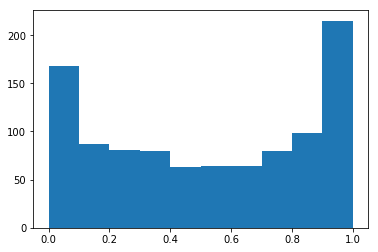

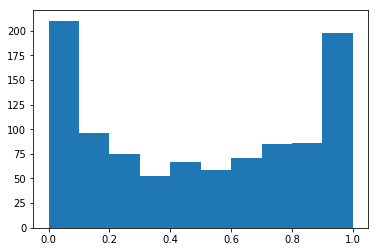

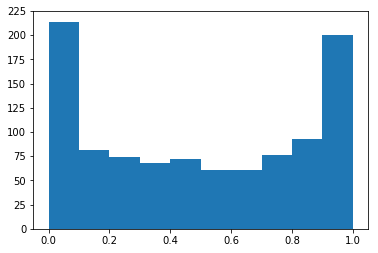

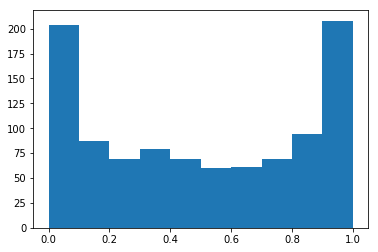

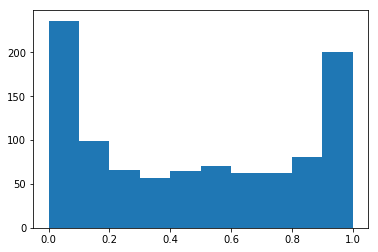

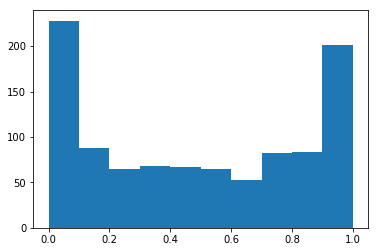

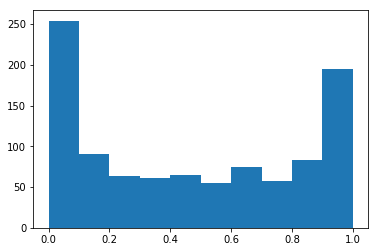

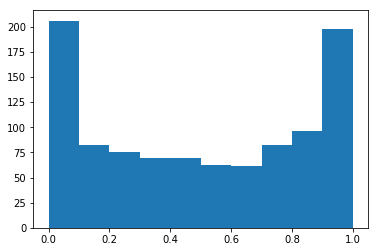

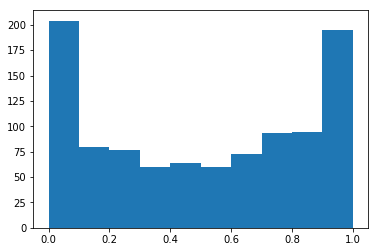

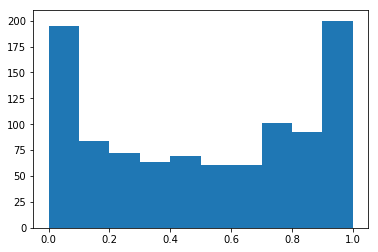

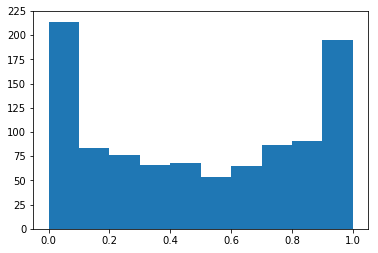

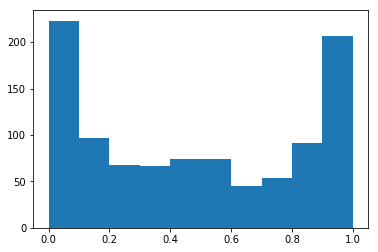

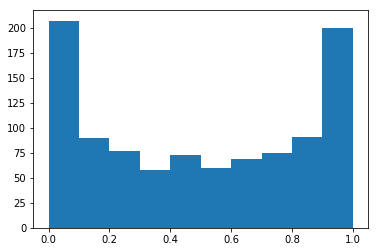

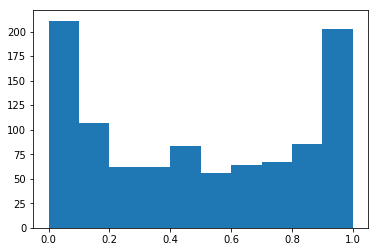

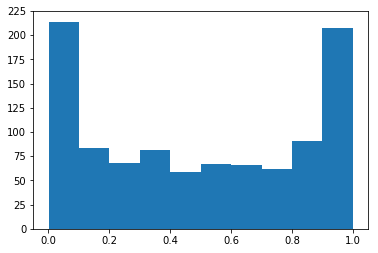

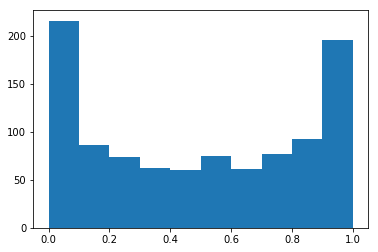

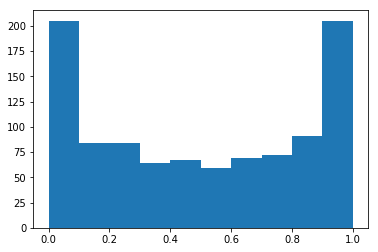

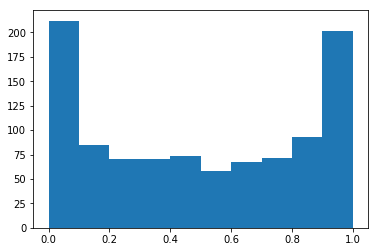

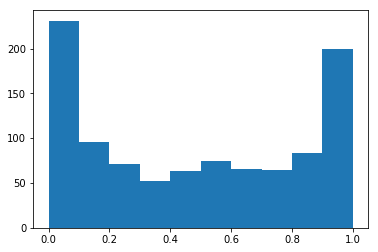

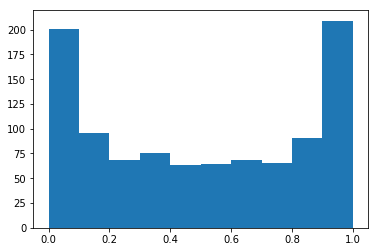

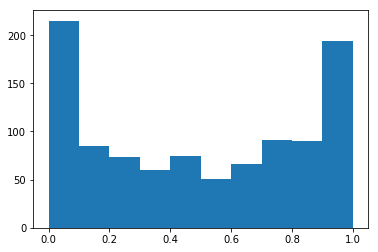

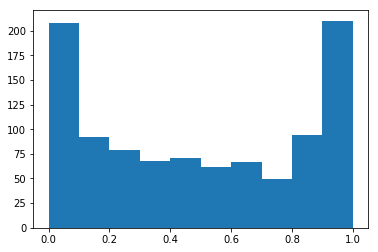

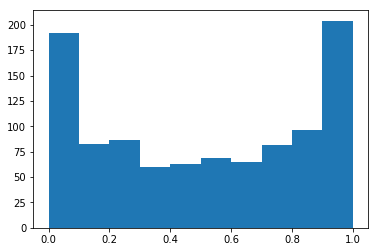

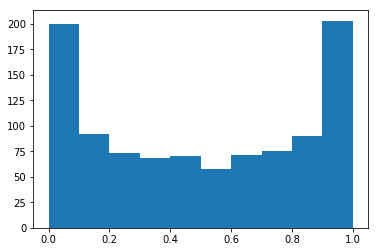

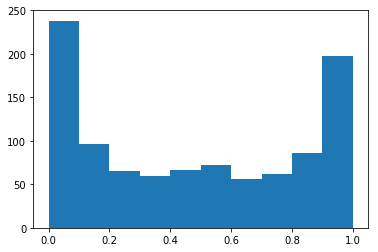

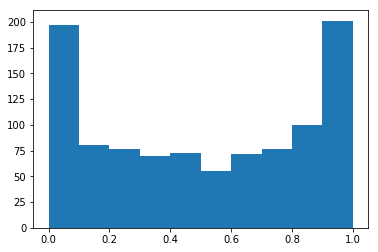

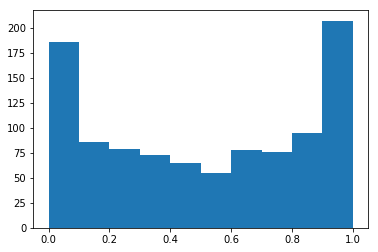

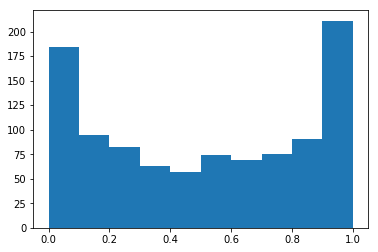

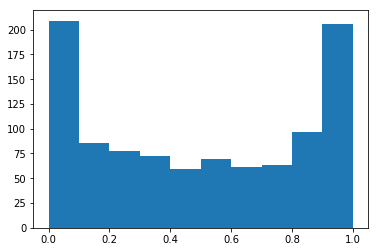

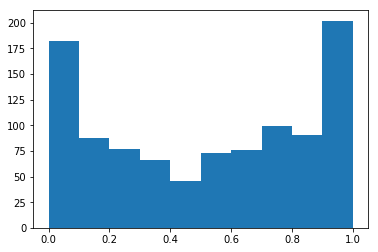

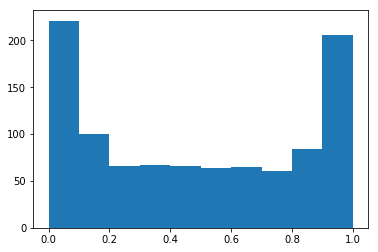

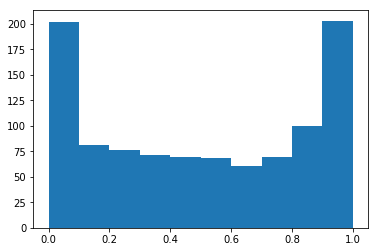

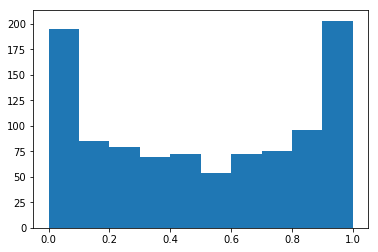

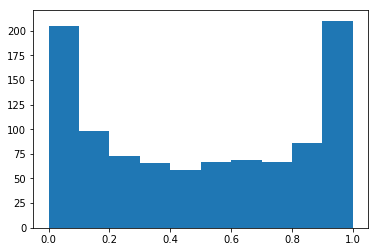

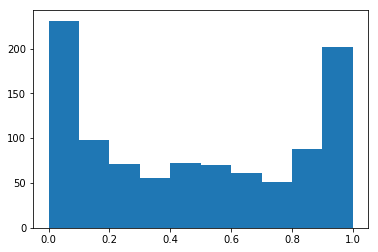

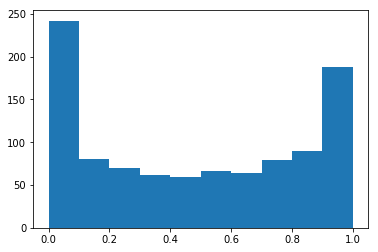

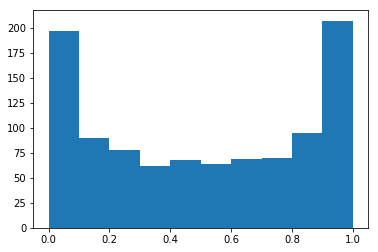

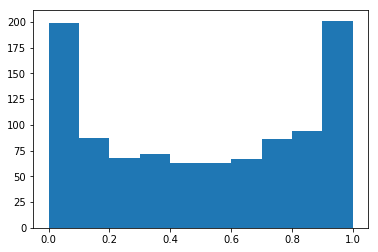

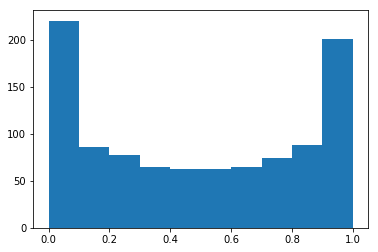

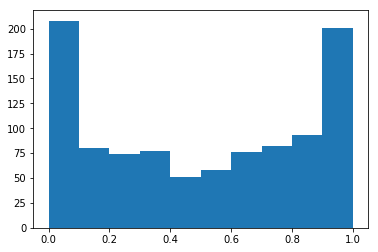

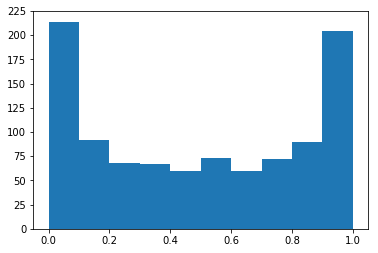

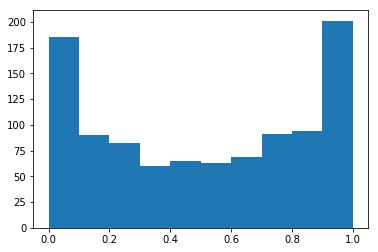

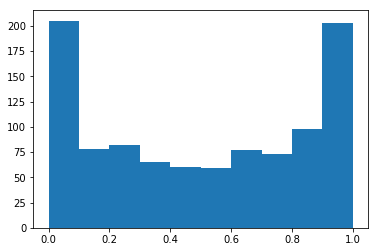

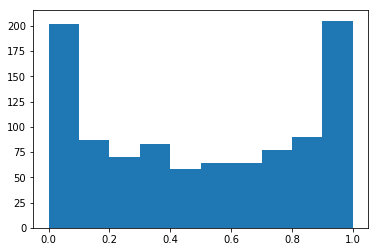

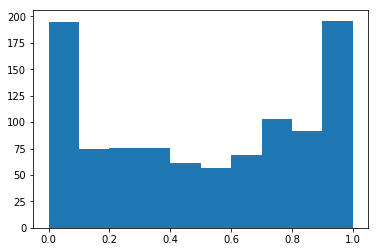

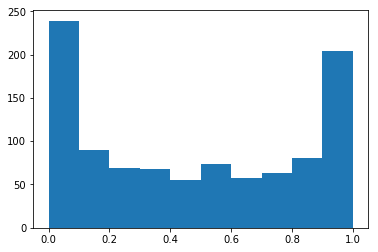

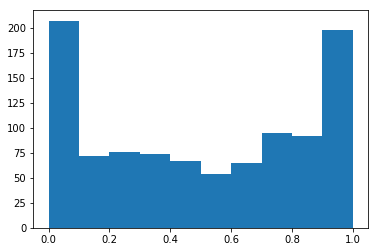

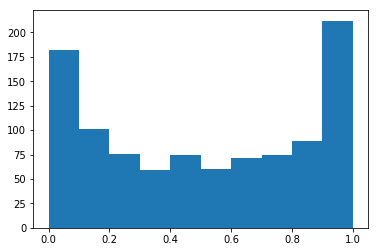

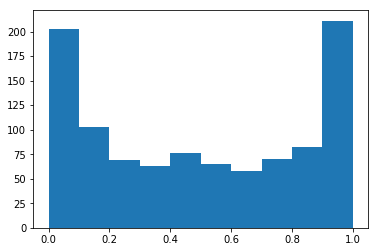

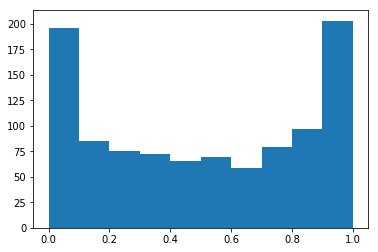

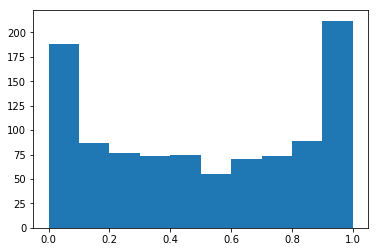

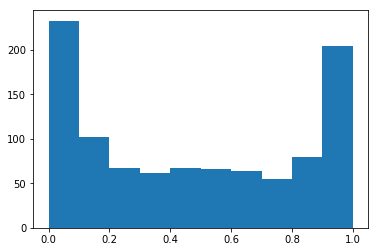

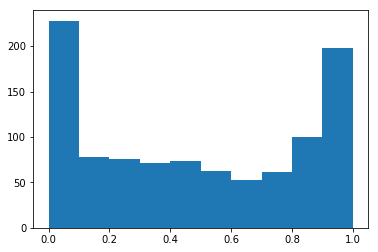

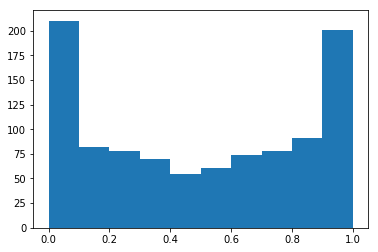

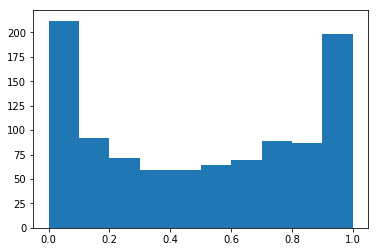

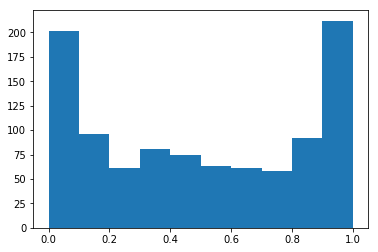

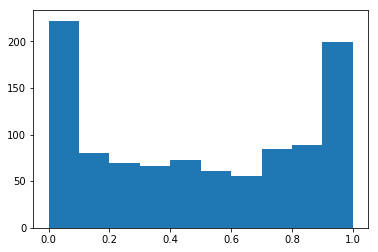

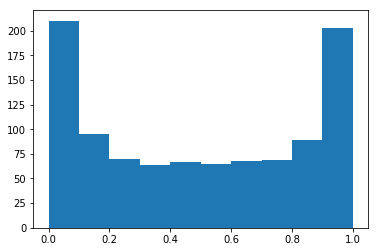

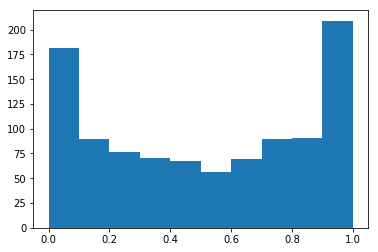

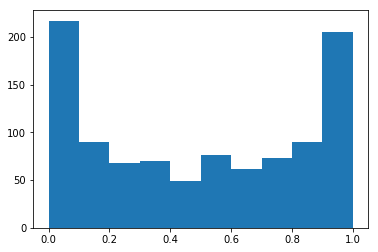

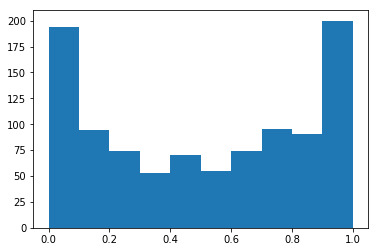

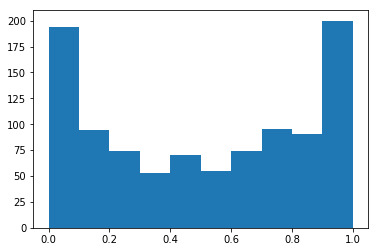

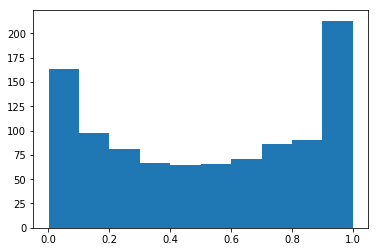

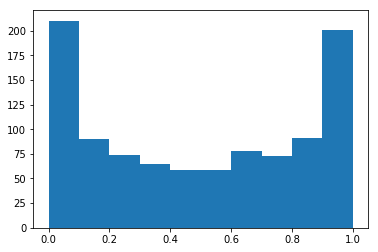

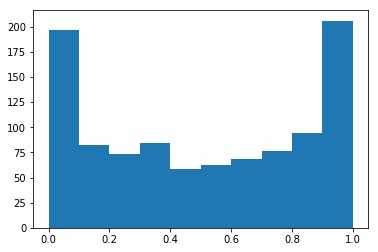

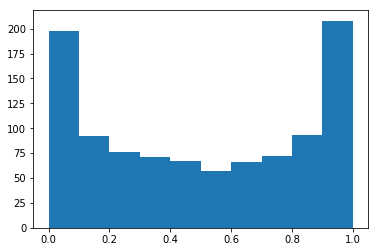

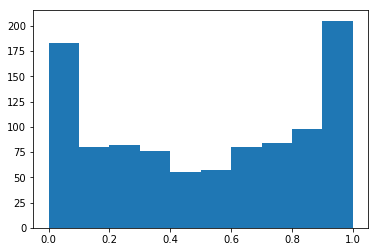

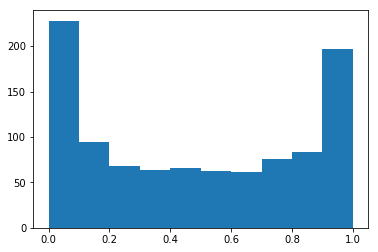

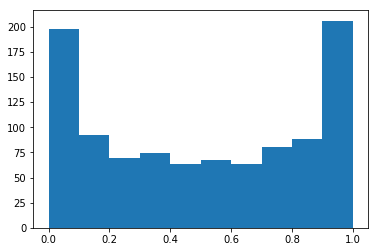

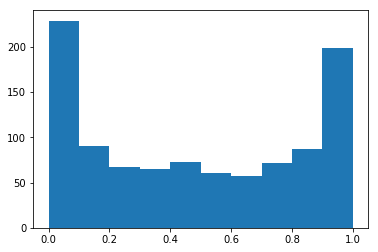

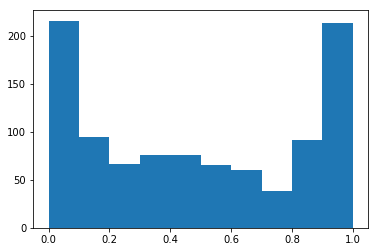

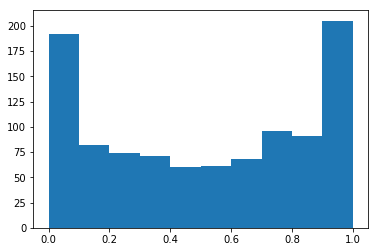

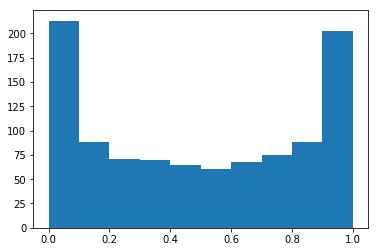

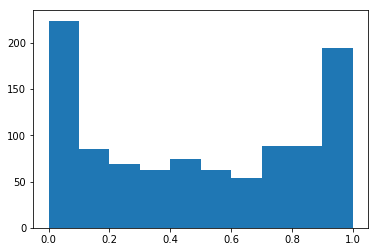

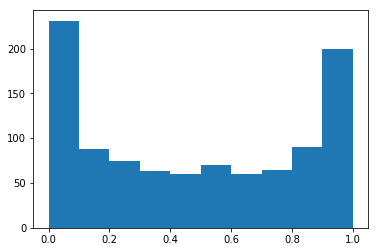

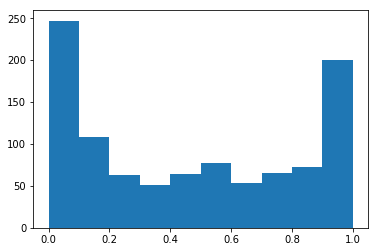

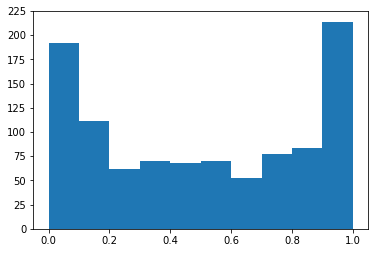

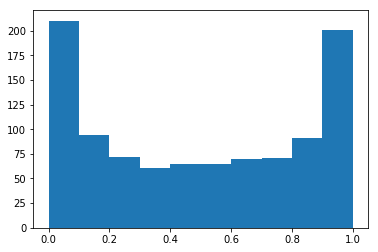

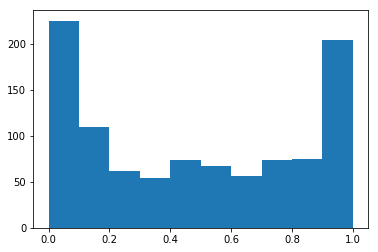

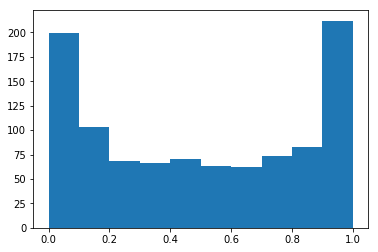

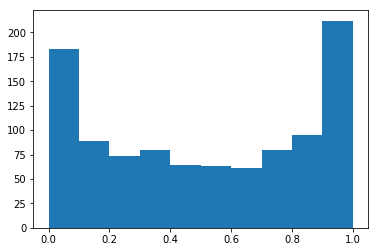

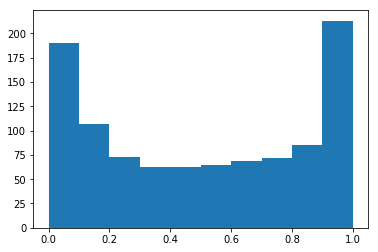

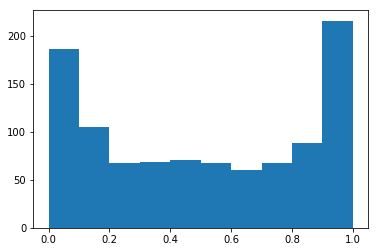

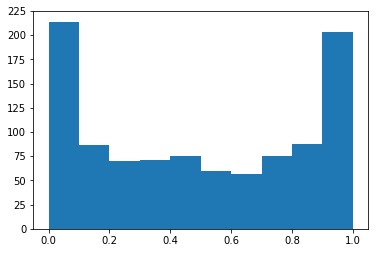

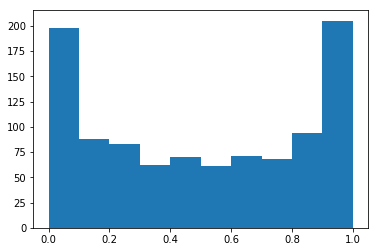

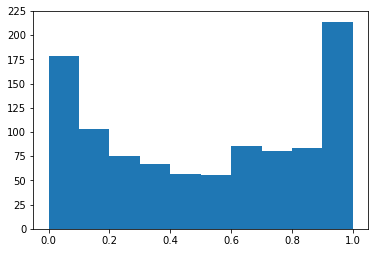

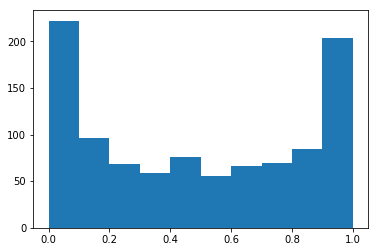

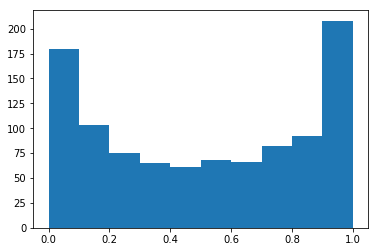

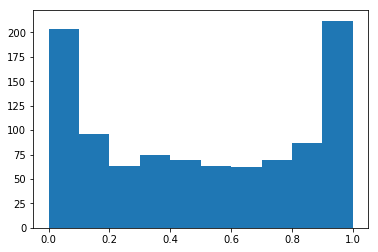

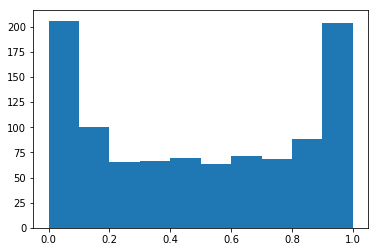

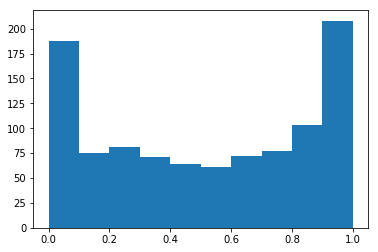

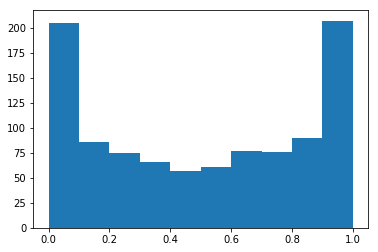

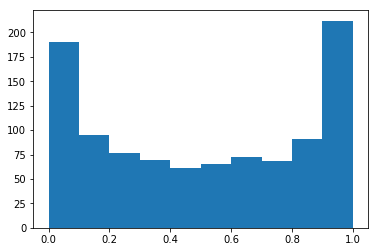

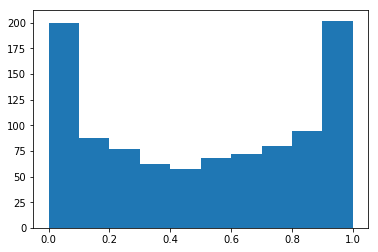

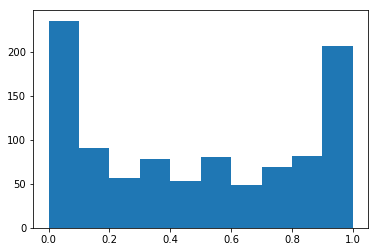

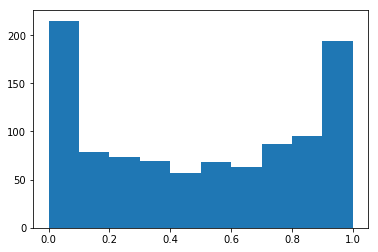

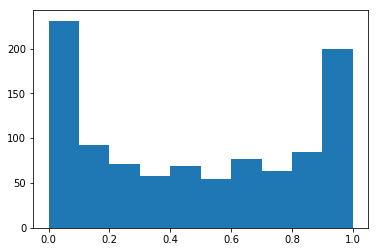

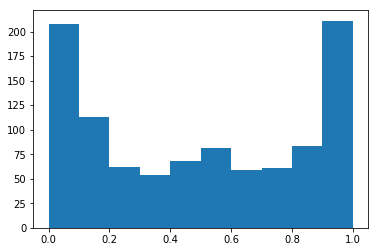

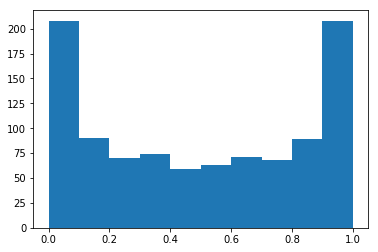

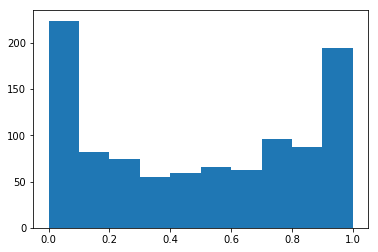

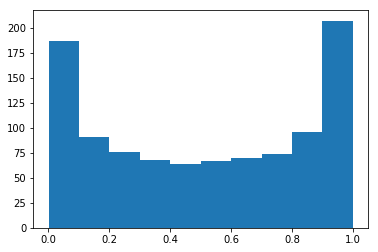

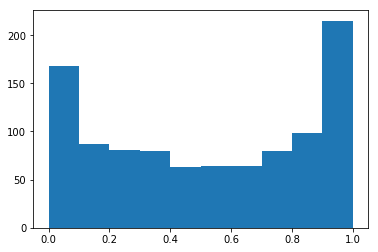

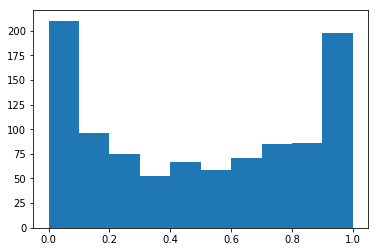

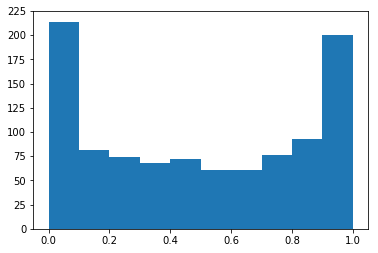

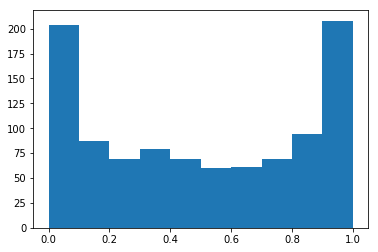

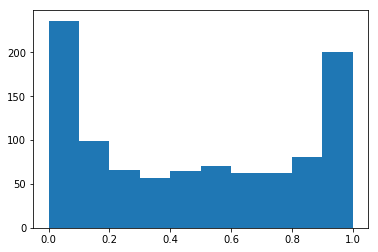

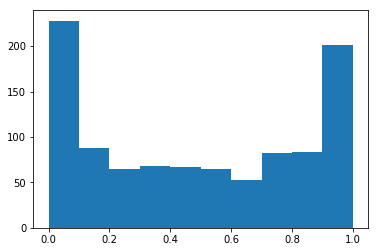

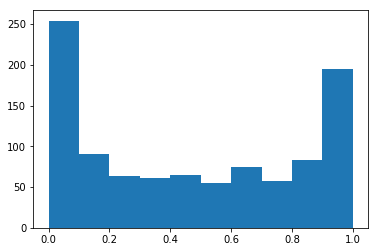

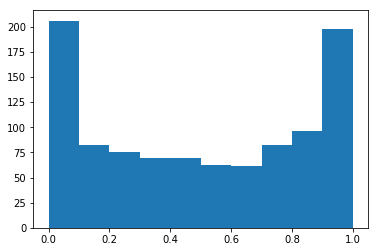

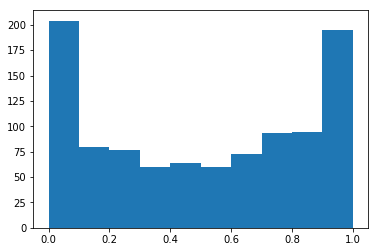

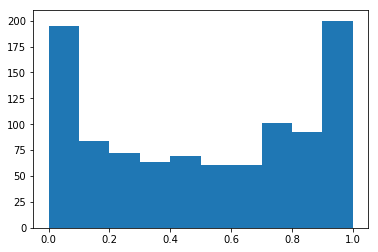

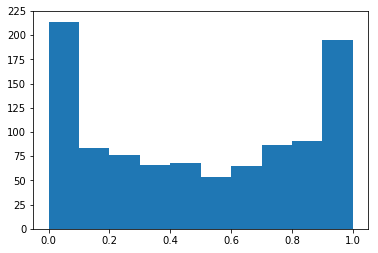

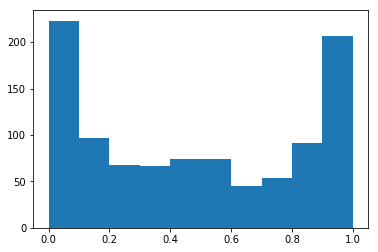

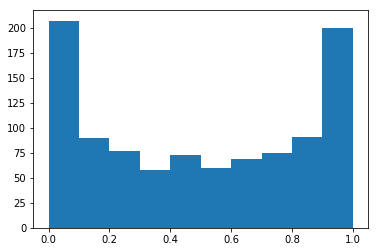

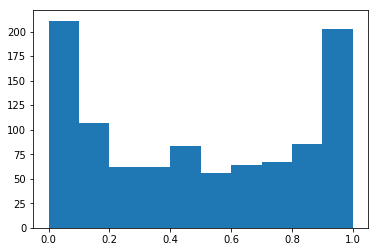

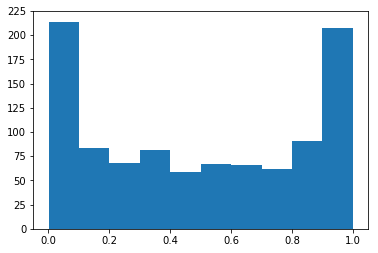

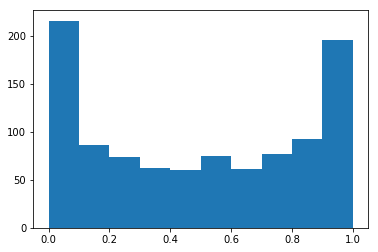

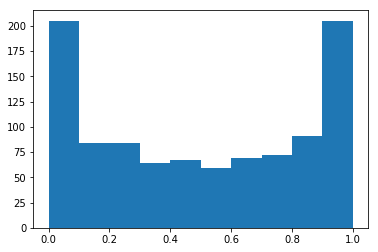

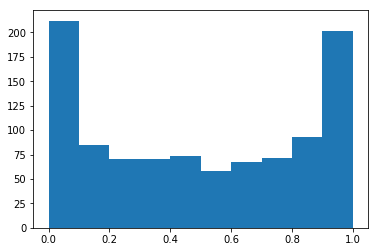

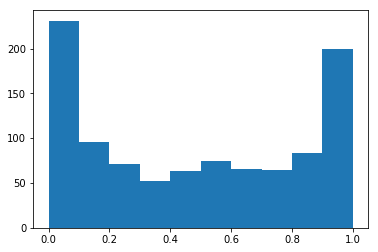

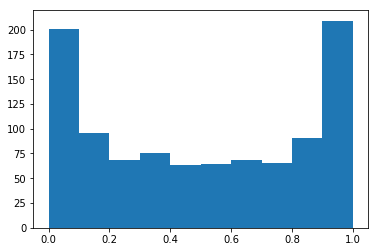

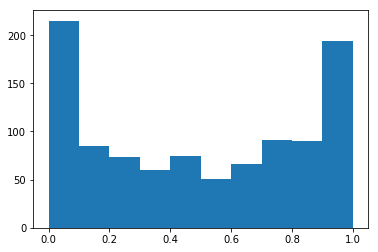

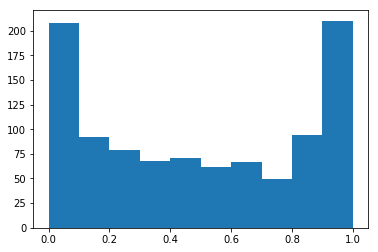

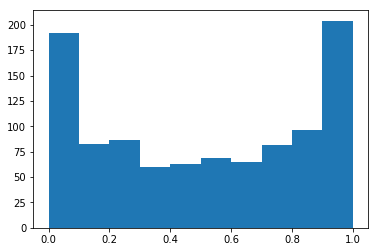

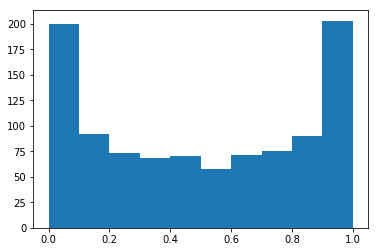

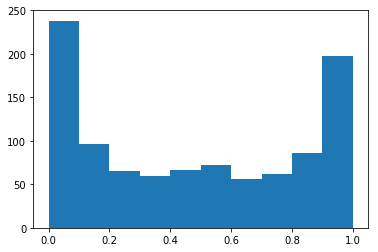

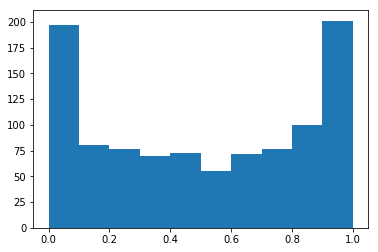

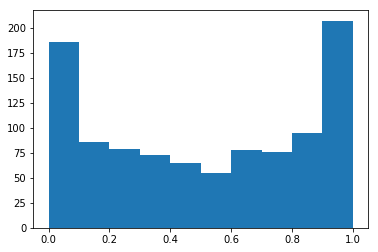

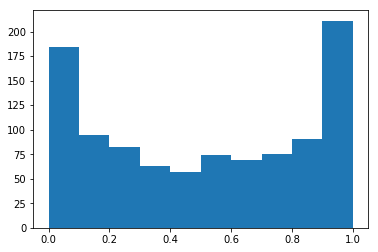

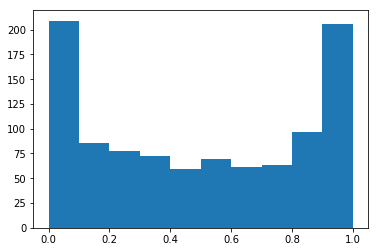

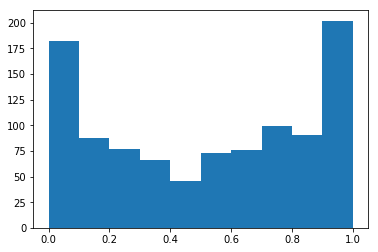

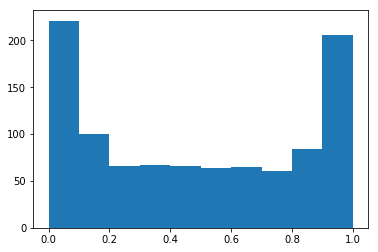

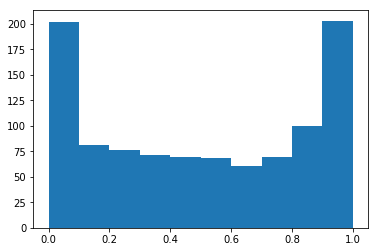

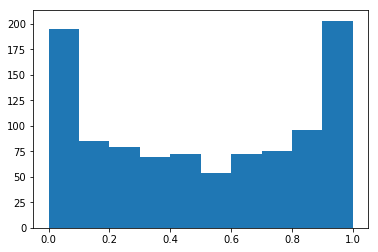

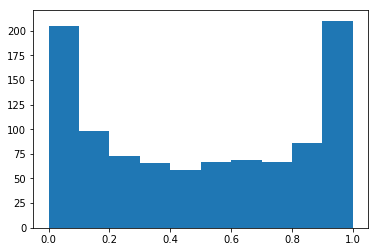

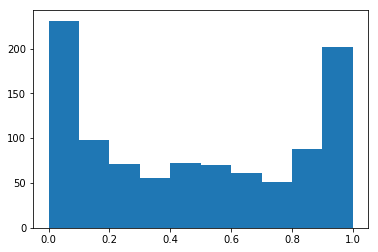

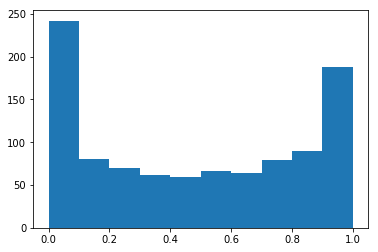

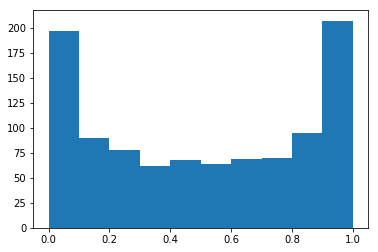

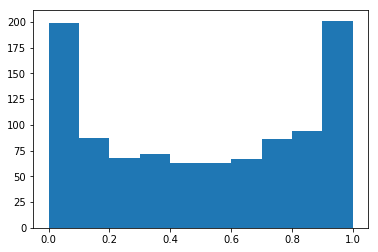

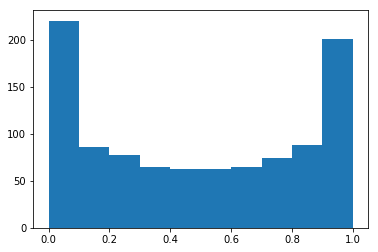

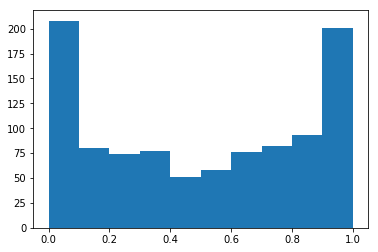

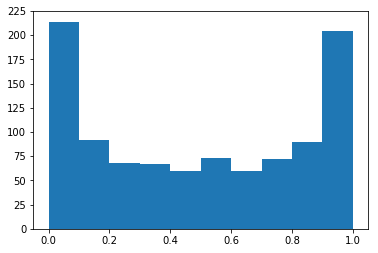

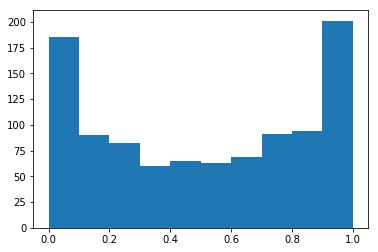

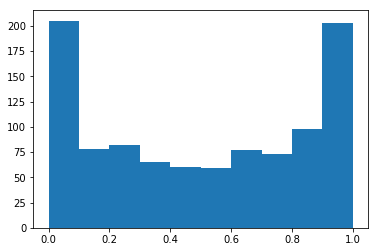

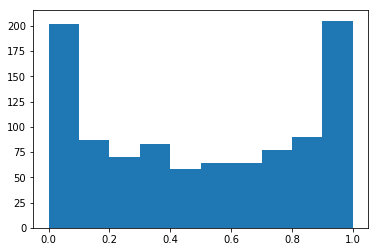

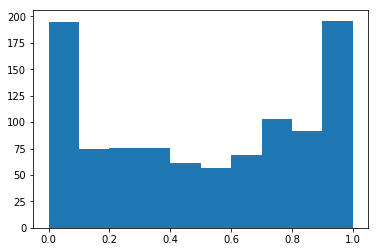

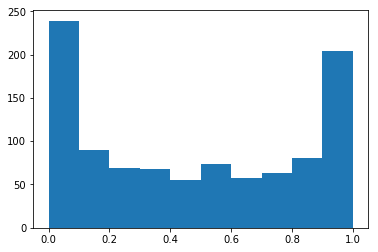

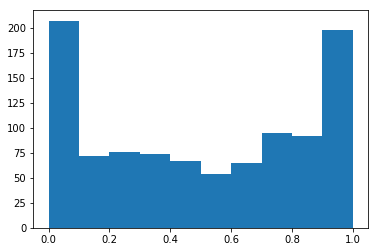

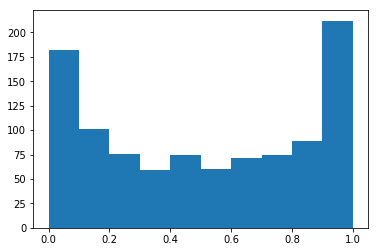

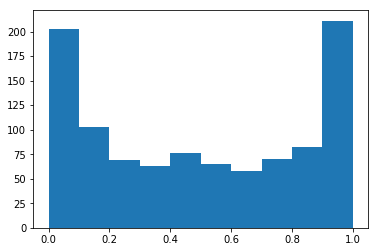

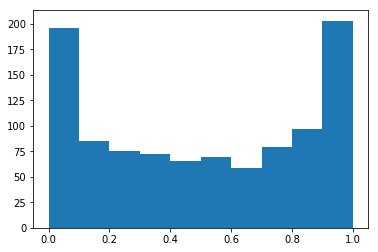

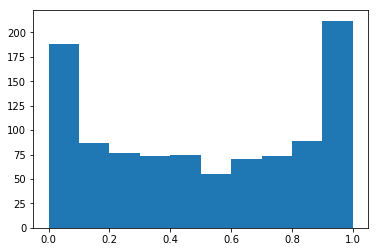

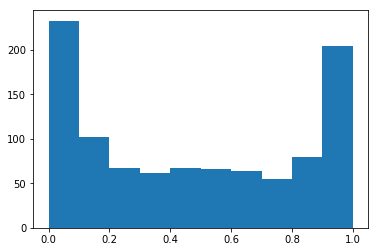

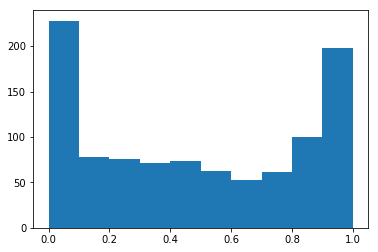

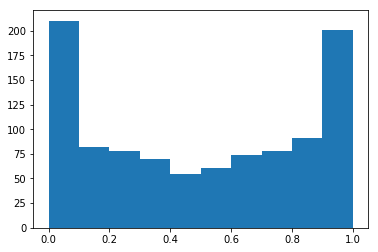

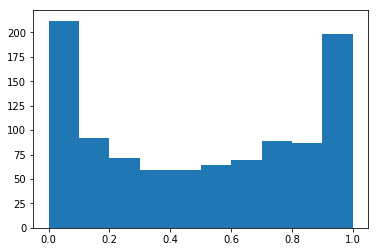

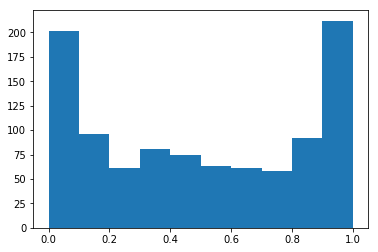

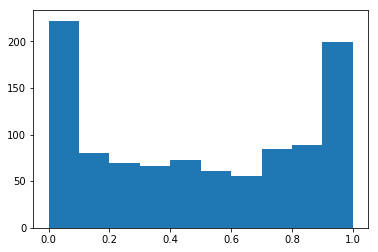

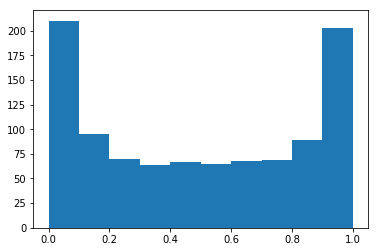

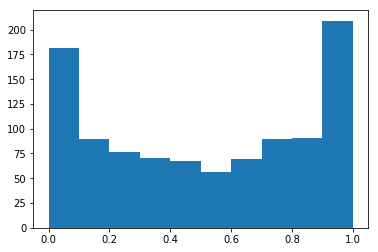

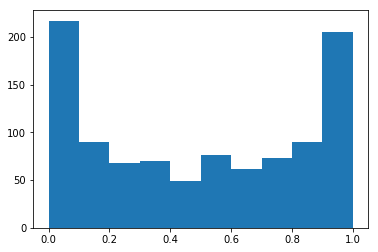

1 loop, best of 3: 12.5 s per loop


In [271]:
x0=np.random.uniform(0,1,100)
%timeit initial(x0)

### **From the plots,we can see most time series are around 0 and 1. That means where these trajectories spend most of their time are in fact typically invariant to the initial condition.**